# Proyecto de Segmentación de Clientes:
Este proyecto utiliza datos de marketing de una empresa que comercializa productos tanto en línea como en tiendas físicas.

El objetivo principal fue agrupar a los clientes en clusters basados en sus patrones de compra, utilizando diversas características relevantes. Para lograrlo, se implementó un modelo de Machine Learning No Supervisado, con el fin de identificar segmentos de clientes y mejorar la estrategia de marketing y ventas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Curso_UTN_Data_Science/

marketing_campaign.csv	marketing_campaign_data_socail_media.csv  marketing_campaign.gsheet


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Curso_UTN_Data_Science/marketing_campaign.csv", sep = "\t")

pd.set_option("display.max.columns", 30)

df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  04-09-2012       58       635         88              546   
1            1  08-03-2014       38        11          1                6   
2            0  21-08-2013       26       426         49              127   
3            0  10-02-2014       26        11          4               20   
4            0  19-01-2014       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  13-06-2013       46       709         43              182   
2236         1  10-06-2014       56       406          0               30   
2237         0  25-01-2014       91       908         48              217   
2238         1  24-01-2014        8       428         30              214   
2239         1  15-10-2012       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 1) Definición de las variables en el Dataset:

Podemos ver que tenemos datos de como responden 2240 clientes a distintas campañas, teniendo ademas información respecto a variables posiblemente explicatorias como edad, estado marital etc.

1. **ID**: Identificador único para cada cliente.
2. **Year_Birth**: Año de nacimiento del cliente.
3. **Education**: Nivel educativo del cliente.
4. **Marital_Status**: Estado civil del cliente.
5. **Income**: Ingreso anual del cliente.
6. **Kidhome**: Número de hijos pequeños que tiene el cliente en casa.
7. **Teenhome**: Número de adolescentes que tiene el cliente en casa.
8. **Dt_Customer**: Fecha en que el cliente fue registrado.
9. **Recency**: Número de días desde la última compra del cliente.
10. **MntWines**: Monto gastado en productos de vinos.
11. **MntFruits**: Monto gastado en productos de frutas.
12. **MntMeatProducts**: Monto gastado en productos cárnicos.
13. **MntFishProducts**: Monto gastado en productos de pescado.
14. **MntSweetProducts**: Monto gastado en productos dulces.
15. **MntGoldProds**: Monto gastado en productos de oro.
16. **NumDealsPurchases**: Número de compras realizadas a través de ofertas o descuentos.
17. **NumWebPurchases**: Número de compras realizadas a través de la web.
18. **NumCatalogPurchases**: Número de compras realizadas mediante el catálogo.
19. **NumStorePurchases**: Número de compras realizadas en tiendas físicas.
20. **NumWebVisitsMonth**: Número de visitas a la página web en el último mes.
21. **AcceptedCmp3**: Indica si el cliente aceptó la tercera campaña de marketing.
22. **AcceptedCmp4**: Indica si el cliente aceptó la cuarta campaña de marketing.
23. **AcceptedCmp5**: Indica si el cliente aceptó la quinta campaña de marketing.
24. **AcceptedCmp1**: Indica si el cliente aceptó la primera campaña de marketing.
25. **AcceptedCmp2**: Indica si el cliente aceptó la segunda campaña de marketing.
26. **Complain**: Indica si el cliente ha presentado alguna queja.
27. **Z_CostContact**: Costo por contacto.
28. **Z_Revenue**: Ingresos generados.
29. **Response**: Indica si el cliente ha respondido positivamente a la última campaña de marketing.

### 2) Busqueda de duplicados y valores nulos:

In [ ]:
# Veamos si tenemos duplicados:

df.duplicated().sum()

0

In [ ]:
df.isna().sum()

# Vemos que tenemos 24 datos faltantes de Income.

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df[df["Income"].isnull()]

# tomo nota de que hay cleintes donde el income no figura, pero como a priori no se si es una variable que me va a
# interesar, lo dejo asi por ahora.

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

### 3) Definición de nuevas variables:

In [ ]:
# Voy a unir las columnas de Hijos en una sola que sea cantidad de hijos:

df["number_of_children"] = df[["Kidhome", "Teenhome"]].sum(axis = 1)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  number_of_children  
0              3         11         1                   0  
1              3         11         0                   2  
2              3         11         0                   0  
3              3         11         0                   1  
4              3         11         0                   1

In [ ]:
# paso Date_Customer a fecha, no se si lo voy a usar

df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# Las columnas de aceptacion a las distintas campañas las voy a tener que pasar a una unica columna donde
# cada numero indique si aceptó alguna campaña.

# me entra la duda de si algun cliente acepto mas de una campaña, que puede ser. Porque si es asi, creo que no corresponderia
# poner en una columna "campaña que aceptó".

# genero una columna nueva que sea numero de campañas aceptadas.

df["number_of_campaigns_accepted"] = df[["AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Response"]].sum(axis = 1)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  ...  NumWebPurchases  NumCatalogPurchases  \
0                88            88  ...                8                   10   
1                 1             6  ...                1                    1   
2                21            42  ...                8                    2   
3                 3             5  ...                2                    0   
4                27            15  ...                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  number_of_children  number_of_campaigns_accepted  
0         11         1                   0                             1  
1         11         0                   2                             0  
2         11         0                   0                             0  
3         11         0                   1                             0  
4         11         0                   1                             0  

[5 rows x 31 columns]

In [ ]:
df.groupby("number_of_campaigns_accepted").count()

# me fijo que valores toma.

# llamativamente hay clientes que aceptaron hasta 5 campañas.

ID  Year_Birth  Education  Marital_Status  \
number_of_campaigns_accepted                                                
0                             1631        1631       1631            1631   
1                              370         370        370             370   
2                              142         142        142             142   
3                               51          51         51              51   
4                               36          36         36              36   
5                               10          10         10              10   

                              Income  Kidhome  Teenhome  Dt_Customer  Recency  \
number_of_campaigns_accepted                                                    
0                               1611     1631      1631         1631     1631   
1                                369      370       370          370      370   
2                                139      142       142          142      142   
3                                 51       51        51           51       51   
4                                 36       36        36           36       36   
5                                 10       10        10           10       10   

                              MntWines  MntFruits  MntMeatProducts  \
number_of_campaigns_accepted                                         
0                                 1631       1631             1631   
1                                  370        370              370   
2                                  142        142              142   
3                                   51         51               51   
4                                   36         36               36   
5                                   10         10               10   

                              MntFishProducts  MntSweetProducts  MntGoldProds  \
number_of_campaigns_accepted                                                    
0                                        1631              1631          1631   
1                                         370               370           370   
2                                         142               142           142   
3                                          51                51            51   
4                                          36                36            36   
5                                          10                10            10   

                              NumDealsPurchases  NumWebPurchases  \
number_of_campaigns_accepted                                       
0                                          1631             1631   
1                                           370              370   
2                                           142              142   
3                                            51               51   
4                                            36               36   
5                                            10               10   

                              NumCatalogPurchases  NumStorePurchases  \
number_of_campaigns_accepted                                           
0                                            1631               1631   
1                                             370                370   
2                                             142                142   
3                                              51                 51   
4                                              36                 36   
5                                              10                 10   

                              NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
number_of_campaigns_accepted                                                  
0                                          1631          1631          1631   
1                                           370           370           370   
2                                           142           142           142   
3                                      

In [ ]:
# verifico

df[df["number_of_campaigns_accepted"] == 5]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
252   10089        1974  Graduation       Divorced  102692.0        0   
430    3725        1961         PhD         Single   84865.0        0   
559    3174        1959  Graduation       Together   87771.0        0   
824    5536        1959  Graduation       Together   87771.0        0   
990    8545        1954  Graduation       Divorced   85683.0        0   
1087   1509        1958         PhD       Together   84460.0        0   
1308   5758        1982  Graduation        Married   65169.0        0   
1710    477        1986  Graduation        Married   83512.0        0   
1922   3138        1956  Graduation         Single   91249.0        0   
2167   3520        1990      Master         Single   91172.0        0   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
252          0  2013-05-04        5       168        148              444   
430          0  2013-09-05        1      1248         16              349   
559          1  2013-05-22       61      1492         38              287   
824          1  2013-05-22       61      1492         38              287   
990          0  2014-03-21        6      1296         17              311   
1087         0  2013-04-01       80       152         27              103   
1308         0  2014-01-14       23      1074          0               69   
1710         0  2014-06-17       31      1060         61              835   
1922         0  2012-10-20       84      1324         27              119   
2167         0  2013-03-27       94       162         28              818   

      MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumWebPurchases  \
252                32               172           148  ...                6   
430                43                16            16  ...                2   
559                50                57            33  ...                5   
824                50                57            33  ...                5   
990                45                69            51  ...                2   
1087              106                54            81  ...                9   
1308                0                 0            46  ...               10   
1710               80                20           101  ...                4   
1922               71               108            27  ...                7   
2167                0                28            56  ...                4   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
252                     9                 13                  2             0   
430                     4                  9                  4             0   
559                    10                  4                  6             0   
824                    10                  4                  6             0   
990                     4                 10                  1             0   
1087                    9                  4                  5             0   
1308                    4                 13                  6             1   
1710                    7                 10                  1             1   
1922                    9                  6                  4             0   
2167                    3                  7                  3             1   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
252              1             1             1             1         0   
430              1             1             1             1         0   
559              1             1             1             1         0   
824              1             1             1             1         0   
990              1             1             1             1         0   
1087             1             1             1             1         0   
1308             0             1             1             1         0   
171

In [ ]:
# y si, estos son clientes que aceptaron varias campañas.
# Por ahora sigo con esta variable "cantidad de campañas que aceptaron", dsp veo si vale la pena clasificar.
# Tmb podria generar una variable que sea "Aceptó/NoAceptó_campaña"

In [ ]:
df["Accepted_Campaigns"] = df["number_of_campaigns_accepted"].apply(lambda x: 1 if x > 0 else 0)
df.head()

# Entonces
# 1: Aceptó al menos una campaña;
# 0: No aceptó campaña.


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  ...  NumCatalogPurchases  \
0                88            88  ...                   10   
1                 1             6  ...                    1   
2                21            42  ...                    2   
3                 3             5  ...                    0   
4                27            15  ...                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  number_of_children  number_of_campaigns_accepted  \
0         11         1                   0                             1   
1         11         0                   2                             0   
2         11         0                   0                             0   
3         11         0                   1                             0   
4         11         0                   1                             0   

   Accepted_Campaigns  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 32 columns]

In [ ]:
# Otra cosa que quiero hacer es obtener la edad de los clientes:

import datetime

In [ ]:
current_year = datetime.datetime.now().year

In [ ]:
current_year

2024

In [ ]:
df["Age"] = current_year - df["Year_Birth"]
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  ...  NumStorePurchases  NumWebVisitsMonth  \
0                88            88  ...                  4                  7   
1                 1             6  ...                  2                  5   
2                21            42  ...                 10                  4   
3                 3             5  ...                  4                  6   
4                27            15  ...                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  number_of_children  \
0         0              3         11         1                   0   
1         0              3         11         0                   2   
2         0              3         11         0                   0   
3         0              3         11         0                   1   
4         0              3         11         0                   1   

   number_of_campaigns_accepted  Accepted_Campaigns  Age  
0                             1                   1   67  
1                             0                   0   70  
2                             0                   0   59  
3                             0                   0   40  
4                             0                   0   43  

[5 rows x 33 columns]

In [ ]:
# Ahora en vez de tener el año quiero agrupar segun rango etario. Primero me fijo que rango de edades tengo:

df.groupby("Age").count()

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
Age                                                                         
28    2           2          2               2       2        2         2   
29    5           5          5               5       5        5         5   
30    3           3          3               3       3        3         3   
31    5           5          5               5       5        5         5   
32   13          13         13              13      13       13        13   
33   15          15         15              15      15       15        15   
34   18          18         18              18      18       18        18   
35   30          30         30              30      29       30        30   
36   29          29         29              29      29       29        29   
37   27          27         27              27      27       27        27   
38   42          42         42              42      41       42        42   
39   32          32         32              32      32       32        32   
40   38          38         38              38      38       38        38   
41   42          42         42              42      41       42        42   
42   45          45         45              45      44       45        45   
43   39          39         39              39      38       39        39   
44   39          39         39              39      39       39        39   
45   53          53         53              53      53       53        53   
46   77          77         77              77      76       77        77   
47   52          52         52              52      52       52        52   
48   89          89         89              89      89       89        89   
49   83          83         83              83      83       83        83   
50   69          69         69              69      69       69        69   
51   74          74         74              74      72       74        74   
52   79          79         79              79      78       79        79   
53   87          87         87              87      86       87        87   
54   77          77         77              77      75       77        77   
55   71          71         71              71      70       71        71   
56   51          51         51              51      51       51        51   
57   44          44         44              44      44       44        44   
58   50          50         50              50      50       50        50   
59   74          74         74              74      74       74        74   
60   42          42         42              42      41       42        42   
61   45          45         45              45      44       45        45   
62   44          44         44              44      44       44        44   
63   36          36         36              36      35       36        36   
64   49          49         49              49      49       49        49   
65   51          51         51              51      50       51        51   
66   53          53         53              53      52       53        53   
67   43          43         43              43      41       43        43   
68   55          55         55              55      55       55        55   
69   49          49         49              49      48       49        49   
70   50          50         50              50      49       50        50   
71   35          35         35              35      35       35        35   
72   52          52         52              52      52       52        52   
73   43          43         43              43      42       43        43   
74   29          29         29              29      29       29        29   
75   30          30         30              30      30       30        30   
76   21          21         21              21      21       21        21   
77   16          16         16              16      16       16        16   
7

In [ ]:
# Hay 3 posibles clientes que desafiaron las leyes de la biologia. Interpreto que accidentalmente hubo un error en el
# data entry, saco esos clientes.

In [ ]:
df.drop(df[df["Age"] > 84].index, inplace = True)

# La funcion .drop funciona dropeando indexes, si no pongo .index, lo que le paso a la funcion es un df donde se cumple esa
# condicion pero no los indexes.

# lo habia corrido sin el inplace y no se me guardaba el cambio

In [ ]:
df

# verifico que son 2240 - 3 filas

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-04-09       58       635         88              546   
1            1  2014-08-03       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-10-02       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-10-06       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumStorePurchases  \
0                 172                88            88  ...                  4   
1                   2                 1             6  ...                  2   
2                 111                21            42  ...                 10   
3                  10                 3             5  ...                  4   
4                  46                27            15  ...                  6   
...               ...               ...           ...  ...                ...   
2235               42               118           247  ...                  4   
2236                0                 0             8  ...                  5   
2237               32                12            24  ...                 13   
2238               80                30            61  ...                 10   
2239                2                 1            21  ...                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ...           ...           ...           ...   
2235                  5             0             0             0   
2236                  7             0             0             0   
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
0                0             0         0              3         11   
1                0             0         0              3         11   
2                0             0         0              3         11   
3                0             0         0              3         11   
4                0             0         0              3

In [ ]:
df.groupby("Age").count()

ID  Year_Birth  Education  Marital_Status  Income  Kidhome  Teenhome  \
Age                                                                         
28    2           2          2               2       2        2         2   
29    5           5          5               5       5        5         5   
30    3           3          3               3       3        3         3   
31    5           5          5               5       5        5         5   
32   13          13         13              13      13       13        13   
33   15          15         15              15      15       15        15   
34   18          18         18              18      18       18        18   
35   30          30         30              30      29       30        30   
36   29          29         29              29      29       29        29   
37   27          27         27              27      27       27        27   
38   42          42         42              42      41       42        42   
39   32          32         32              32      32       32        32   
40   38          38         38              38      38       38        38   
41   42          42         42              42      41       42        42   
42   45          45         45              45      44       45        45   
43   39          39         39              39      38       39        39   
44   39          39         39              39      39       39        39   
45   53          53         53              53      53       53        53   
46   77          77         77              77      76       77        77   
47   52          52         52              52      52       52        52   
48   89          89         89              89      89       89        89   
49   83          83         83              83      83       83        83   
50   69          69         69              69      69       69        69   
51   74          74         74              74      72       74        74   
52   79          79         79              79      78       79        79   
53   87          87         87              87      86       87        87   
54   77          77         77              77      75       77        77   
55   71          71         71              71      70       71        71   
56   51          51         51              51      51       51        51   
57   44          44         44              44      44       44        44   
58   50          50         50              50      50       50        50   
59   74          74         74              74      74       74        74   
60   42          42         42              42      41       42        42   
61   45          45         45              45      44       45        45   
62   44          44         44              44      44       44        44   
63   36          36         36              36      35       36        36   
64   49          49         49              49      49       49        49   
65   51          51         51              51      50       51        51   
66   53          53         53              53      52       53        53   
67   43          43         43              43      41       43        43   
68   55          55         55              55      55       55        55   
69   49          49         49              49      48       49        49   
70   50          50         50              50      49       50        50   
71   35          35         35              35      35       35        35   
72   52          52         52              52      52       52        52   
73   43          43         43              43      42       43        43   
74   29          29         29              29      29       29        29   
75   30          30         30              30      30       30        30   
76   21          21         21              21      21       21        21   
77   16          16         16              16      16       16        16   
7

Entonces de aca obtengo que el rango etario de los cleintes va desde (28-84)

Voy a armar rangos de edad:

- (20-30)
- (31-40)
- (41-50)
- (51-60)
- (61-70)
- (71-85)



In [ ]:
age_ranges = [(20,30),(31,40),(41,50),(51,60),(61,70),(71,85)]

def age_sorter_function(Edad):
  for age_range in age_ranges:
    if age_range[0] <= Edad <= age_range[1]:
      return f"{age_range[0]} - {age_range[1]}"

  return "Unknown"

# aplico la funcion a la columna:

df["Age_Range"] = df["Age"].apply(age_sorter_function)

# Al principio habia opuesto el return unknown dentro del if loop. Entonces me itraba unknown en el head, y tiene sentido
# porque si no se cumplia la condicion para el primer age_range, daba unknown. Pero si lo pongo por fuera del if loop,
# solo se activa cuando el loop itera por todos los rangos y no encuentra rango que calce con Edad.

In [ ]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-04-09       58       635         88              546   
1            1  2014-08-03       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-10-02       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-10-06       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  ...  NumWebVisitsMonth  \
0                 172                88            88  ...                  7   
1                   2                 1             6  ...                  5   
2                 111                21            42  ...                  4   
3                  10                 3             5  ...                  6   
4                  46                27            15  ...                  5   
...               ...               ...           ...  ...                ...   
2235               42               118           247  ...                  5   
2236                0                 0             8  ...                  7   
2237               32                12            24  ...                  6   
2238               80                30            61  ...                  3   
2239                2                 1            21  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  number_of_children  \
0            0              3         11         1                   0   
1            0              3         11         0                   2   
2            0              3         11         0                   0   
3            

In [ ]:
# Dsp esta variable la tengo que pasar a numerica que vaya de 1-6 para hacer la codificacion de variables

In [ ]:
# Voy a definir tmb la variable Total_Amount_Spent:

df["Total_Amount_Spent"] = df[["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds"]].sum(axis = 1)
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-04-09       58       635         88              546   
1            1  2014-08-03       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-10-02       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2235         1  2013-06-13       46       709         43              182   
2236         1  2014-10-06       56       406          0               30   
2237         0  2014-01-25       91       908         48              217   
2238         1  2014-01-24        8       428         30              214   
2239         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  ...  AcceptedCmp3  \
0                 172                88            88  ...             0   
1                   2                 1             6  ...             0   
2                 111                21            42  ...             0   
3                  10                 3             5  ...             0   
4                  46                27            15  ...             0   
...               ...               ...           ...  ...           ...   
2235               42               118           247  ...             0   
2236                0                 0             8  ...             0   
2237               32                12            24  ...             0   
2238               80                30            61  ...             0   
2239                2                 1            21  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  number_of_children  \
0                 3         11         1                   0   
1                 3         11         0                   2   
2                 3         11         0                   0   
3                 3         11         0                   1   
4                 3         11         0                   1   
...             ...        ...   

In [ ]:

df.groupby("Education").count()


ID  Year_Birth  Marital_Status  Income  Kidhome  Teenhome  \
Education                                                                 
2n Cycle     201         201             201     198      201       201   
Basic         54          54              54      54       54        54   
Graduation  1127        1127            1127    1116     1127      1127   
Master       370         370             370     365      370       370   
PhD          485         485             485     480      485       485   

            Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
Education                                                                
2n Cycle            201      201       201        201              201   
Basic                54       54        54         54               54   
Graduation         1127     1127      1127       1127             1127   
Master              370      370       370        370              370   
PhD                 485      485       485        485              485   

            MntFishProducts  MntSweetProducts  MntGoldProds  \
Education                                                     
2n Cycle                201               201           201   
Basic                    54                54            54   
Graduation             1127              1127          1127   
Master                  370               370           370   
PhD                     485               485           485   

            NumDealsPurchases  ...  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Education                      ...                                             
2n Cycle                  201  ...           201           201           201   
Basic                      54  ...            54            54            54   
Graduation               1127  ...          1127          1127          1127   
Master                    370  ...           370           370           370   
PhD                       485  ...           485           485           485   

            AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
Education                                                                    
2n Cycle             201           201       201            201        201   
Basic                 54            54        54             54         54   
Graduation          1127          1127      1127           1127       1127   
Master               370           370       370            370        370   
PhD                  485           485       485            485        485   

            Response  number_of_children  number_of_campaigns_accepted  \
Education                                                                
2n Cycle         201                 201                           201   
Basic             54                  54                            54   
Graduation      1127                1127                          1127   
Master           370                 370                           370   
PhD              485                 485                           485   

            Accepted_Campaigns   Age  Age_Range  Total_Amount_Spent  
Education                                                            
2n Cycle                   201   201        201                 201  
Basic                       54    54         54                  54  
Graduation                1127  1127       1127                1127  
Master                     370   370        370                 370  
PhD                        485   485        485                 485  

[5 rows x 34 columns]

Voy a codificar la variable educación, organizo la educación en una escala donde del 1 al 5 aumente el "nivel de educación":

1. Basic
2. 2d Cycle
3. Graduation
4. Master
5. PhD



In [ ]:
df["Education"] = df["Education"].replace({"Basic" : 1,
                                           "2n Cycle" : 2,
                                           "Graduation" : 3,
                                           "Master" : 4,
                                           "PhD" : 5})

<ipython-input-30-6a75f6e38263>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Education"] = df["Education"].replace({"Basic" : 1,


### 4) Exploración de datos:

In [ ]:

pd.set_option("display.max.columns", 40)
df.head()

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          3         Single  58138.0        0         0   
1  2174        1954          3         Single  46344.0        1         1   
2  4141        1965          3       Together  71613.0        0         0   
3  6182        1984          3       Together  26646.0        1         0   
4  5324        1981          5        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  number_of_children  \
0              3         11         1                   0   
1              3         11         0                   2   
2              3         11         0                   0   
3              3         11         0                   1   
4              3         11         0                   1   

   number_of_campaigns_accepted  Accepted_Campaigns  Age Age_Range  \
0                             1                   1   67   61 - 70   
1                             0                   0   70   61 - 70   
2                             0                   0   59   51 - 60   
3                             0                   0   40   31 - 40   
4                             0                   0   43   41 - 50   

   Total_Amount_Spent  
0                1617  
1                  27  
2                 776  
3                  53  
4                 422

**Que cosas me interesa explorar, teniendo en cuenta que busco sementar a los clientes:**



**1**.   Total_Amount_Spent vs Age_Range

**2**.   Total_Amount_Spent vs Marital_Range

**3**. Total_Amount_Spent vs number_of_children

**4**. Accepted_Campaigns vs Age_Range

**5**. Accepted_Campaigns vs Marital_Range

**6**. Accepted_Campaigns vs number_of_children

**7**. Total_Amount_Spent vs Education

**8**. Total_Amount_Spent vs Education




In [ ]:
age_count = pd.DataFrame(df.groupby("Age_Range")["Total_Amount_Spent"].count())
# como hago .count lo que obtengo es la suma de compras por edad.

total_count = age_count['Total_Amount_Spent'].sum()

age_count.rename(columns = {"Total_Amount_Spent":"cantidad_compras_edad"}, inplace = True)

age_count["percentage"] = age_count/total_count*100
age_count["percentage"].sum()

# Calculo el porcentaje de clientes por edad

100.0

In [ ]:
age_count

cantidad_compras_edad  percentage
Age_Range                                   
20 - 30                       10    0.447027
31 - 40                      249   11.130979
41 - 50                      588   26.285203
51 - 60                      649   29.012070
61 - 70                      475   21.233795
71 - 85                      266   11.890925

Esto nos muestra que hay que tener cuidado a la hora de sacar conclusiones respecto a cual rango etario gasta mas con la suma total porque hay algunos rangos que estan mas representados.

Text(0.5, 1.0, 'Porcentaje de clientes por rango etario')

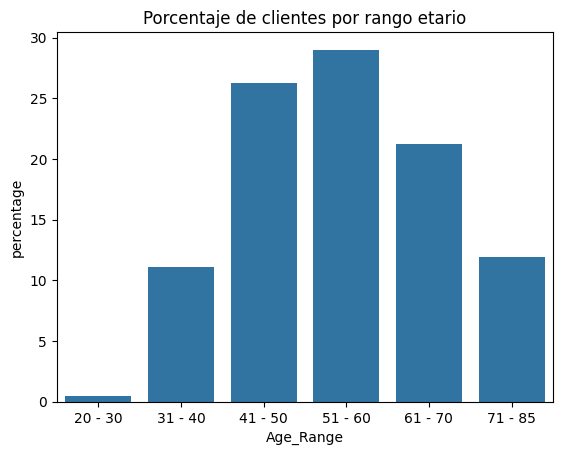

In [ ]:
sns.barplot(age_count, x = "Age_Range", y = "percentage")
plt.title("Porcentaje de clientes por rango etario")

Se puede observar que la mayoria de los clientes se agrupanentre 31-85, con los mas representados siendo aquellos entre 41-70 años.

Ahora, hay ciertos rangos que estan mas representados, pero gastan mas, menos o igual que los menos representados. Para abordar esto en vez de agrupar y hacer el conteo, hago la media que en cierta manera es la normalización por la cantidad de personas.

In [ ]:
age_mean_spent = pd.DataFrame(df.groupby("Age_Range")["Total_Amount_Spent"].mean())
age_mean_spent.rename(columns = {"Total_Amount_Spent":"mean_amount_spent"}, inplace = True)
age_mean_spent.reset_index()

Age_Range  mean_amount_spent
0   20 - 30         831.600000
1   31 - 40         566.779116
2   41 - 50         520.488095
3   51 - 60         574.152542
4   61 - 70         690.467368
5   71 - 85         747.969925

Text(0.5, 1.0, 'Gasto promedio por rango etario')

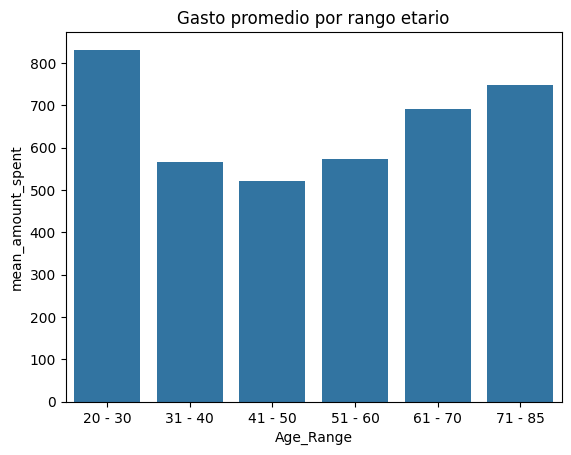

In [ ]:
sns.barplot(data = age_mean_spent, x = "Age_Range", y = "mean_amount_spent")
plt.title("Gasto promedio por rango etario")

Entonces, si bien los rangos etarios 20-30, 71-85 son los que menos representados estan, esto son los que en promedio mas gastan. Ahora, tmb es cierto que el mayor caudal de dinero ingresa por los rangos etarios del medio.

Voy a hacer un grafico de paretto para ver:
1. Caules son los grupos que compran mas.
2. Cuales son los grupos que mayor caudal de dinero aportan.

#### Paretto - Cantidad de compras:

In [ ]:
age_count.sort_values(by = "cantidad_compras_edad", ascending = False, inplace = True)
age_count

cantidad_compras_edad  percentage
Age_Range                                   
51 - 60                      649   29.012070
41 - 50                      588   26.285203
61 - 70                      475   21.233795
71 - 85                      266   11.890925
31 - 40                      249   11.130979
20 - 30                       10    0.447027

In [ ]:
# Calculo el % acumulado:

age_count["cantidad_compras_acum_%"] = age_count["cantidad_compras_edad"].cumsum() / age_count["cantidad_compras_edad"].sum() * 100

In [ ]:
age_count.reset_index(inplace = True)
age_count

Age_Range  cantidad_compras_edad  percentage  cantidad_compras_acum_%
0   51 - 60                    649   29.012070                29.012070
1   41 - 50                    588   26.285203                55.297273
2   61 - 70                    475   21.233795                76.531068
3   71 - 85                    266   11.890925                88.421994
4   31 - 40                    249   11.130979                99.552973
5   20 - 30                     10    0.447027               100.000000

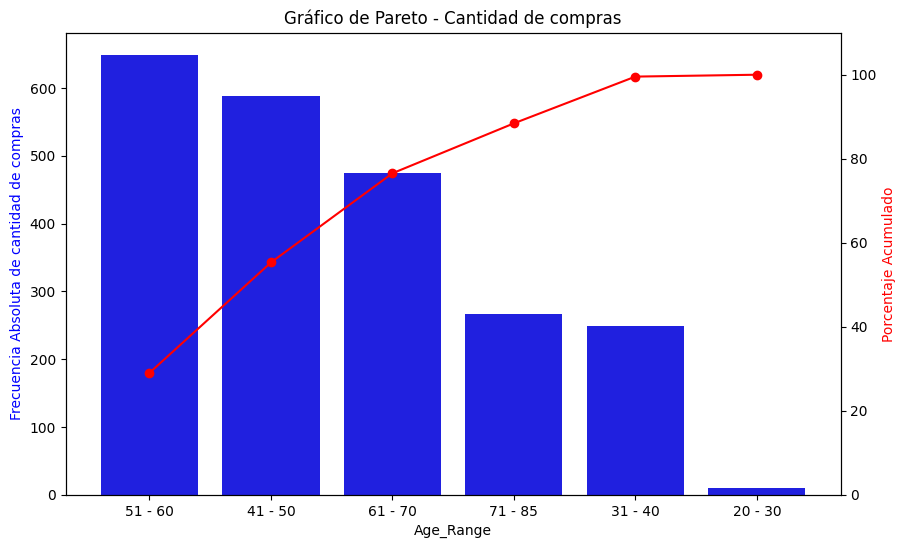

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras con seaborn
sns.barplot(data=age_count, ax=ax1, x="Age_Range", y="cantidad_compras_edad", color="b")

# Crear segundo eje para la línea acumulada
ax2 = ax1.twinx()
ax2.plot(age_count["Age_Range"], age_count["cantidad_compras_acum_%"], color="r", marker="o")
ax2.set_ylim([0, 110])

# Etiquetas de los ejes
ax1.set_ylabel("Frecuencia Absoluta de cantidad de compras", color="b")
ax2.set_ylabel("Porcentaje Acumulado", color="r")

# Título del gráfico
plt.title("Gráfico de Pareto - Cantidad de compras")

# Mostrar el gráfico
plt.show()


La mayor cantidad de compras se da por personas de entre 41-85 años.

#### Paretto - Total Amount Spent

In [ ]:
age_spent_sum = pd.DataFrame(df.groupby("Age_Range")["Total_Amount_Spent"].sum())
age_spent_sum.reset_index(inplace = True)
age_spent_sum.sort_values(by = "Total_Amount_Spent", ascending = False, inplace = True)
age_spent_sum

Age_Range  Total_Amount_Spent
3   51 - 60              372625
4   61 - 70              327972
2   41 - 50              306047
5   71 - 85              198960
1   31 - 40              141128
0   20 - 30                8316

In [ ]:
age_spent_sum["acum_spent_%"] = age_spent_sum["Total_Amount_Spent"].cumsum() / age_spent_sum["Total_Amount_Spent"].sum() * 100

In [ ]:
age_spent_sum.reset_index(inplace = True)
age_spent_sum

index Age_Range  Total_Amount_Spent  acum_spent_%
0      3   51 - 60              372625     27.499026
1      4   61 - 70              327972     51.702744
2      2   41 - 50              306047     74.288438
3      5   71 - 85              198960     88.971313
4      1   31 - 40              141128     99.386295
5      0   20 - 30                8316    100.000000

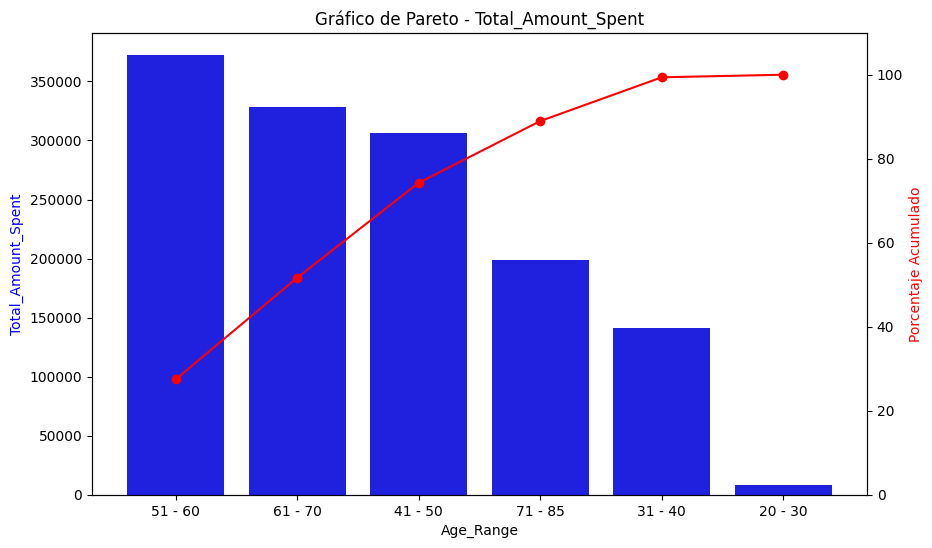

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras con seaborn
sns.barplot(data=age_spent_sum, ax=ax1, x="Age_Range", y="Total_Amount_Spent", color="b")

# Creo segundo eje para la línea acumulada
ax2 = ax1.twinx()
ax2.plot(age_spent_sum["Age_Range"], age_spent_sum["acum_spent_%"], color="r", marker="o")
ax2.set_ylim([0, 110])

# Etiquetas de los ejes
ax1.set_ylabel("Total_Amount_Spent", color="b")
ax2.set_ylabel("Porcentaje Acumulado", color="r")

# Título del gráfico
plt.title("Gráfico de Pareto - Total_Amount_Spent")

# Mostrar el gráfico
plt.show()


Entonces, la población de clientes que generan el 80% de los ingresos a la empresa se encuentra en un rango etario de 41-85.

Hay algun rango etario que acepte un mayor numero de campañas?

Text(0.5, 1.0, 'Average number of accepted campaigns')

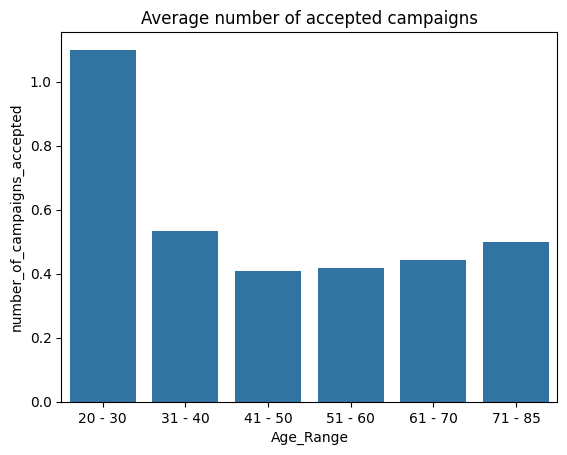

In [ ]:
number_campaigns_mean = pd.DataFrame(df.groupby("Age_Range")["number_of_campaigns_accepted"].mean())
sns.barplot(data = number_campaigns_mean, x = "Age_Range", y = "number_of_campaigns_accepted")
plt.title("Average number of accepted campaigns")

Esto sugiere que aunque los jovenes de 20-30 años son los que menos compran, son los mas receptivos a aceptar campañas de marketing. Tmb sabiamos que son los que mas gastan. El resto, el promedio de campañas aceptadas es de aprox 0.5, sugiriendo que 1 de cada 2 personas aceptan las campañas.

#### Marital State:

In [ ]:
df.head()

ID  Year_Birth  Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          3         Single  58138.0        0         0   
1  2174        1954          3         Single  46344.0        1         1   
2  4141        1965          3       Together  71613.0        0         0   
3  6182        1984          3       Together  26646.0        1         0   
4  5324        1981          5        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-04-09       58       635         88              546              172   
1  2014-08-03       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-10-02       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  number_of_children  \
0              3         11         1                   0   
1              3         11         0                   2   
2              3         11         0                   0   
3              3         11         0                   1   
4              3         11         0                   1   

   number_of_campaigns_accepted  Accepted_Campaigns  Age Age_Range  \
0                             1                   1   67   61 - 70   
1                             0                   0   70   61 - 70   
2                             0                   0   59   51 - 60   
3                             0                   0   40   31 - 40   
4                             0                   0   43   41 - 50   

   Total_Amount_Spent  
0                1617  
1                  27  
2                 776  
3                  53  
4                 422

In [ ]:
df.groupby("Marital_Status")["ID"].count()

Marital_Status
Absurd        2
Alone         3
Divorced    231
Married     864
Single      479
Together    579
Widow        77
YOLO          2
Name: ID, dtype: int64

In [ ]:
# Vemos que tenemos 4 clientes que ingresaron opciones que no tienen sentido. Procedo a sacarlos del df.

df.drop(df[df["Marital_Status"] == "Absurd"].index, inplace = True)
df.drop(df[df["Marital_Status"] == "YOLO"].index, inplace = True)
df.groupby("Marital_Status")["ID"].count()

Marital_Status
Alone         3
Divorced    231
Married     864
Single      479
Together    579
Widow        77
Name: ID, dtype: int64

In [ ]:
# Vemos que Widow y Alone son los que menos compras hacen.
# Voy a calcular que % del dinero que ingresa viene de compras de los distintos estados maritales:

amount_spent_marital_sum = pd.DataFrame(df.groupby("Marital_Status")["Total_Amount_Spent"].sum())
total_amount_marital = amount_spent_marital_sum["Total_Amount_Spent"].sum()
total_amount_marital


1351815

In [ ]:
amount_spent_marital_sum["Porcentage_amount_marital"] = amount_spent_marital_sum["Total_Amount_Spent"] / total_amount_marital * 100

In [ ]:
amount_spent_marital_sum

Total_Amount_Spent  Porcentage_amount_marital
Marital_Status                                               
Alone                          770                   0.056960
Divorced                    141601                  10.474880
Married                     510453                  37.760566
Single                      291090                  21.533272
Together                    351012                  25.965979
Widow                        56889                   4.208342

Text(0.5, 1.0, 'Porcentaje de dinero que ingresa por estado marital')

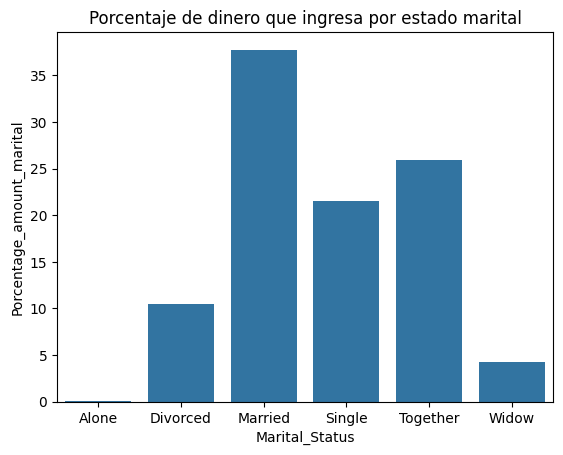

In [ ]:
sns.barplot(amount_spent_marital_sum, x = "Marital_Status", y = "Porcentage_amount_marital")
plt.title("Porcentaje de dinero que ingresa por estado marital")

Text(0.5, 1.0, 'Average number of accepted campaigns by MArital Status')

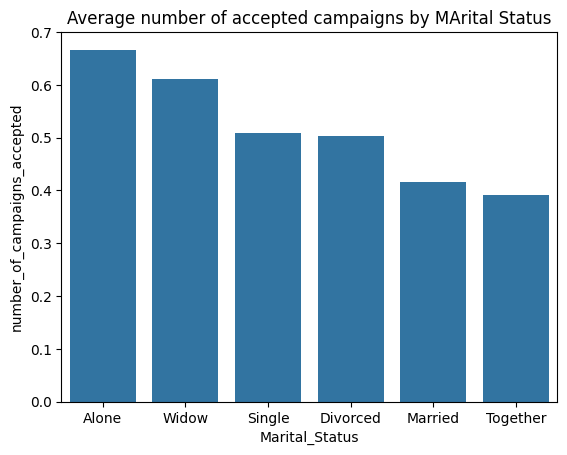

In [ ]:
number_campaigns_mean = pd.DataFrame(df.groupby("Marital_Status")["number_of_campaigns_accepted"].mean())
number_campaigns_mean.sort_values(by = "number_of_campaigns_accepted", inplace = True, ascending = False)
sns.barplot(data = number_campaigns_mean, x = "Marital_Status", y = "number_of_campaigns_accepted")
plt.title("Average number of accepted campaigns by MArital Status")

In [ ]:
# Algunos estados maritales son mas proclives a aceptar campañas, pero por ahora tomo nota de esto nomas.

Conclusion Estado Marital: Las personas casadas son las que mas dinero invierten en la empresa, sin embargo son las menos proclives a aceptar campañas.
Ademas, resuleta interesante que los estados maritales que menos invierten en la empresa son los mas receptivos a las campañas. Por lo que podria haber esperanza de crecimiento targueteando a esos grupos.

Parece que estan aquellos estados maritales que son "pareja" y otros que estan "solos". Por lo que para codificar esta variable e incluirla en el modelo voy a agrupar si los clientes estan solos o en pareja:

In [ ]:
df["Marital_Status"] = df["Marital_Status"].replace({"Alone": 0,
                                                     "Widow": 0,
                                                     "Single": 0,
                                                     "Divorced": 0,
                                                     "Married": 1,
                                                     "Together": 1})

marital_count = df.groupby("Marital_Status")["ID"].count().reset_index()
marital_total = marital_count["ID"].sum()
marital_count["Percentage"] = marital_count["ID"]/marital_total*100
marital_count


<ipython-input-55-d5554710d38f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Marital_Status"] = df["Marital_Status"].replace({"Alone": 0,


Marital_Status    ID  Percentage
0               0   790   35.378415
1               1  1443   64.621585

El 64% de los clientes vive con alguien.

#### Number of children:

In [ ]:
df.groupby("number_of_children")["ID"].sum()

# los clientes tienen hasta 3 hijos.

number_of_children
0    3552928
1    6280336
2    2354272
3     295191
Name: ID, dtype: int64

In [ ]:
amount_spent_children_sum = pd.DataFrame(df.groupby("number_of_children")["Total_Amount_Spent"].sum())
total_amount_children = amount_spent_children_sum["Total_Amount_Spent"].sum()

amount_spent_children_sum["Porcentage_amount_children"] = amount_spent_children_sum["Total_Amount_Spent"] / total_amount_children * 100


In [ ]:
amount_spent_children_sum.reset_index(inplace = True)

amount_spent_children_sum




number_of_children  Total_Amount_Spent  Porcentage_amount_children
0                   0              701409                   51.886464
1                   1              532308                   39.377282
2                   2              103544                    7.659628
3                   3               14554                    1.076627

Text(0.5, 1.0, 'Cantidad de dinero que ingresa por cantidad de hijos')

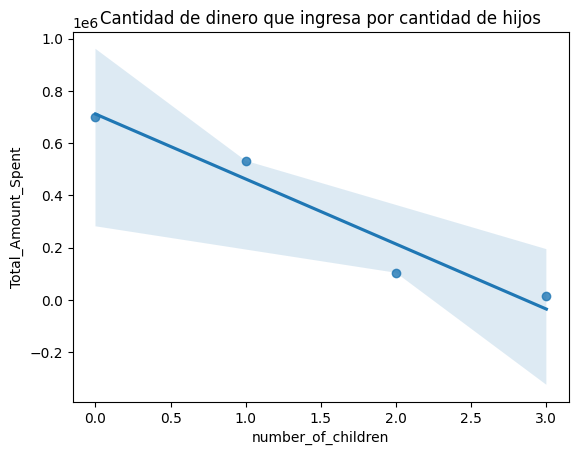

In [ ]:
sns.regplot(amount_spent_children_sum, x = "number_of_children", y = "Total_Amount_Spent")
plt.title("Cantidad de dinero que ingresa por cantidad de hijos")

In [ ]:
amount_spent_children_sum.corr(method = "pearson")

number_of_children  Total_Amount_Spent  \
number_of_children                    1.000000           -0.969839   
Total_Amount_Spent                   -0.969839            1.000000   
Porcentage_amount_children           -0.969839            1.000000   

                            Porcentage_amount_children  
number_of_children                           -0.969839  
Total_Amount_Spent                            1.000000  
Porcentage_amount_children                    1.000000

Hay una fuerte correlacion negativa entre children y Total_Amount_Spent

Text(0.5, 1.0, 'Average number of accepted campaigns vs children')

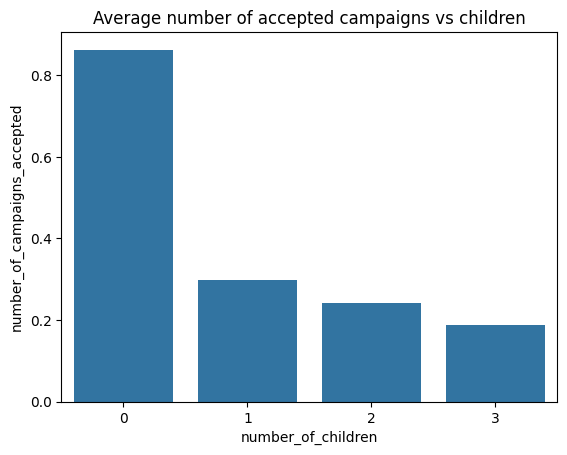

In [ ]:
number_campaigns_mean = pd.DataFrame(df.groupby("number_of_children")["number_of_campaigns_accepted"].mean())
number_campaigns_mean.sort_values(by = "number_of_campaigns_accepted", inplace = True, ascending = False)
sns.barplot(data = number_campaigns_mean, x = "number_of_children", y = "number_of_campaigns_accepted")
plt.title("Average number of accepted campaigns vs children")

In [ ]:
number_campaigns_mean.reset_index(inplace = True)
number_campaigns_mean.corr(method="pearson")

number_of_children  number_of_campaigns_accepted
number_of_children                      1.000000                     -0.857469
number_of_campaigns_accepted           -0.857469                      1.000000

Hay una fuerte correlacion entre cantidad de hijos y dinero que invierten en la empresa y numero de campañas que aceptan.

#### Datetime:

In [ ]:
df.reset_index(inplace = True)

In [ ]:
df

index     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0         0   5524        1957          3               0  58138.0        0   
1         1   2174        1954          3               0  46344.0        1   
2         2   4141        1965          3               1  71613.0        0   
3         3   6182        1984          3               1  26646.0        1   
4         4   5324        1981          5               1  58293.0        1   
...     ...    ...         ...        ...             ...      ...      ...   
2228   2235  10870        1967          3               1  61223.0        0   
2229   2236   4001        1946          5               1  64014.0        2   
2230   2237   7270        1981          3               0  56981.0        0   
2231   2238   8235        1956          4               1  69245.0        0   
2232   2239   9405        1954          5               1  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0            0  2012-04-09       58       635         88              546   
1            1  2014-08-03       38        11          1                6   
2            0  2013-08-21       26       426         49              127   
3            0  2014-10-02       26        11          4               20   
4            0  2014-01-19       94       173         43              118   
...        ...         ...      ...       ...        ...              ...   
2228         1  2013-06-13       46       709         43              182   
2229         1  2014-10-06       56       406          0               30   
2230         0  2014-01-25       91       908         48              217   
2231         1  2014-01-24        8       428         30              214   
2232         1  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2228               42               118           247                  2   
2229                0                 0             8                  7   
2230               32                12            24                  1   
2231               80                30            61                  2   
2232                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2228                9                    3                  4   
2229                8                    2                  5   
2230                2                    3                 13   
2231                6                    5                 10   
2232                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0                     7             0             0             0   
1                     5             0             0             0   
2                     4             0             0             0   
3                     6             0             0             0   
4                     5             0             0             0   
...                 ... 

In [ ]:
df["month_purchased"] = df["Dt_Customer"].dt.month
df["year_purchased"] = df["Dt_Customer"].dt.year

# cree dos columnas una par mes de copra y otra para el año.

In [ ]:
df.head()

index    ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      0  5524        1957          3               0  58138.0        0   
1      1  2174        1954          3               0  46344.0        1   
2      2  4141        1965          3               1  71613.0        0   
3      3  6182        1984          3               1  26646.0        1   
4      4  5324        1981          5               1  58293.0        1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0  2012-04-09       58       635         88              546   
1         1  2014-08-03       38        11          1                6   
2         0  2013-08-21       26       426         49              127   
3         0  2014-10-02       26        11          4               20   
4         0  2014-01-19       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  number_of_children  \
0         0              3         11         1                   0   
1         0              3         11         0                   2   
2         0              3         11         0                   0   
3         0              3         11         0                   1   
4         0              3         11         0                   1   

   number_of_campaigns_accepted  Accepted_Campaigns  Age Age_Range  \
0                             1                   1   67   61 - 70   
1                             0                   0   70   61 - 70   
2                             0                   0   59   51 - 60   
3                             0                   0   40   31 - 40   
4                             0                   0   43   41 - 50   

   Total_Amount_Spent  month_purchased  year_purchased  
0                1617                4            2012  
1                  27                8            2014  
2                 776                8            2013  
3                  53               10            2014  
4                 422                1            2014

In [ ]:
yearly_count = pd.DataFrame(df.groupby(["year_purchased", "month_purchased"])["ID"].count())
yearly_count

ID
year_purchased month_purchased     
2012           1                 16
               2                  9
               3                 21
               4                 17
               5                 17
               6                 14
               7                 23
               8                 91
               9                 67
               10                79
               11                62
               12                75
2013           1                 96
               2                113
               3                103
               4                 96
               5                 93
               6                 95
               7                 94
               8                104
               9                 85
               10               106
               11               100
               12               102
2014           1                 79
               2                 65
               3                 78
               4                 71
               5                 81
               6                 61
               7                 24
               8                 16
               9                 12
               10                21
               11                23
               12                24

<Axes: xlabel='month_purchased', ylabel='ID'>

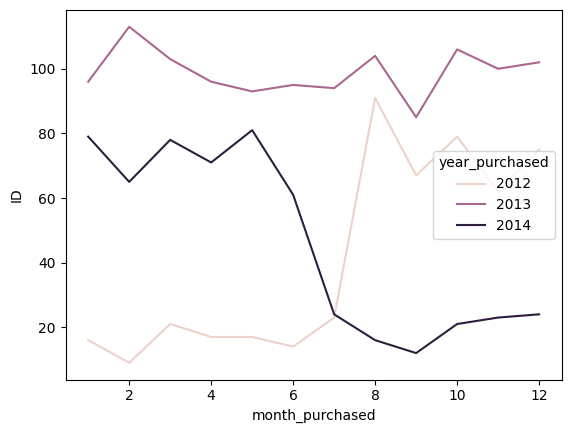

In [ ]:
sns.lineplot(data = yearly_count, x = "month_purchased", y = "ID", hue = "year_purchased")

In [ ]:
# No se ve una tendencia clara

#### Education:

In [ ]:
df.groupby("Education")["ID"].count()

Education
1      54
2     201
3    1126
4     369
5     483
Name: ID, dtype: int64

<Axes: xlabel='Education', ylabel='Count'>

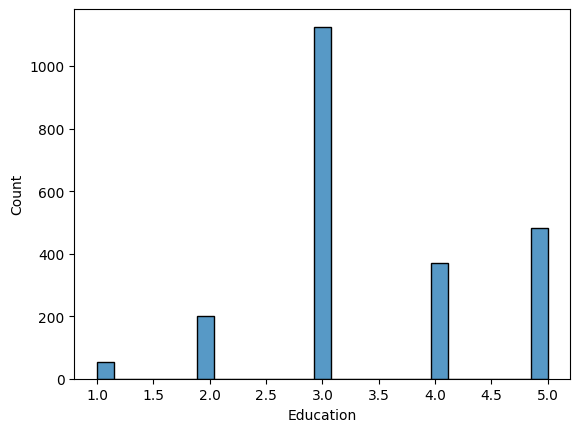

In [ ]:
sns.histplot(df["Education"])

<Axes: xlabel='Education', ylabel='Total_Amount_Spent'>

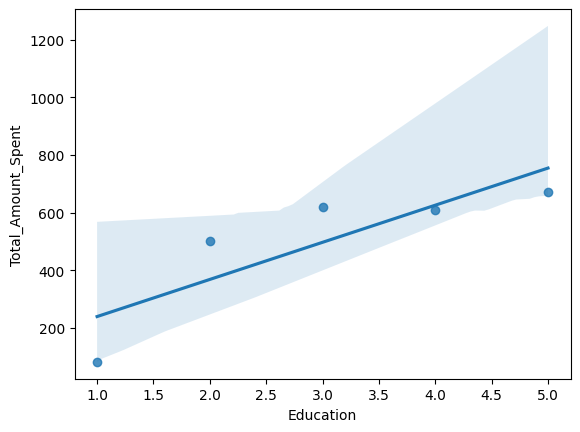

In [ ]:
education_mean = df.groupby("Education")["Total_Amount_Spent"].mean().reset_index()
sns.regplot(education_mean, x = "Education", y = "Total_Amount_Spent")

In [ ]:
education_mean.corr(method = "pearson")

Education  Total_Amount_Spent
Education            1.000000            0.848139
Total_Amount_Spent   0.848139            1.000000

Pareceria haber una fuerte correlacion positiva entre la cantidad de dinero gastado y el nivel de educacion.

### 5) Correlaciones:

<Axes: >

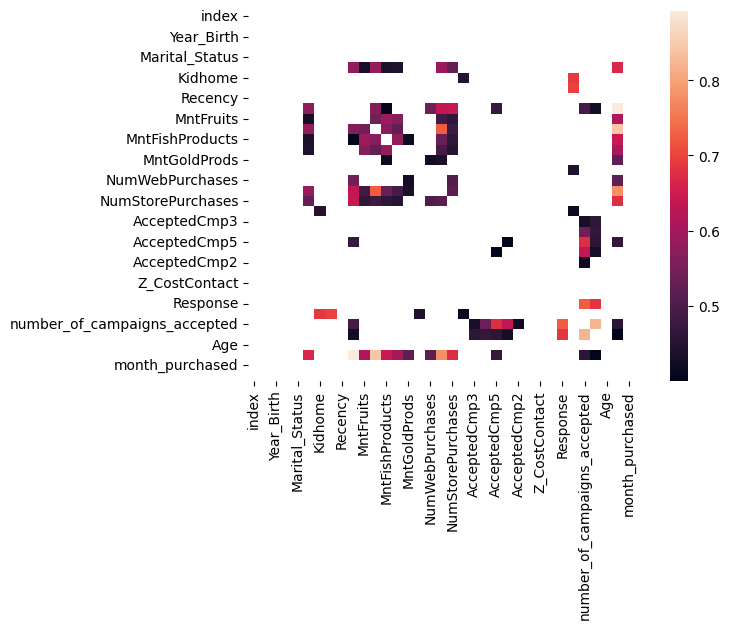

In [ ]:
all_correlations = df.corr(method = "pearson", numeric_only = True)

# voy a filtrar por aquellos que son mas relevantes:
all_correlations = all_correlations[(all_correlations >= 0.4) & (all_correlations < 1)]
sns.heatmap(all_correlations)

In [ ]:
all_correlations["Total_Amount_Spent"]

index                                NaN
ID                                   NaN
Year_Birth                           NaN
Education                            NaN
Marital_Status                       NaN
Income                          0.667298
Kidhome                              NaN
Teenhome                             NaN
Recency                              NaN
MntWines                        0.892077
MntFruits                       0.612692
MntMeatProducts                 0.842893
MntFishProducts                 0.642678
MntSweetProducts                0.602968
MntGoldProds                    0.522646
NumDealsPurchases                    NaN
NumWebPurchases                 0.520971
NumCatalogPurchases             0.778432
NumStorePurchases               0.675733
NumWebVisitsMonth                    NaN
AcceptedCmp3                         NaN
AcceptedCmp4                         NaN
AcceptedCmp5                    0.468509
AcceptedCmp1                         NaN
AcceptedCmp2                         NaN
Complain                             NaN
Z_CostContact                        NaN
Z_Revenue                            NaN
Response                             NaN
number_of_children                   NaN
number_of_campaigns_accepted    0.455986
Accepted_Campaigns              0.400617
Age                                  NaN
Total_Amount_Spent                   NaN
month_purchased                      NaN
year_purchased                       NaN
Name: Total_Amount_Spent, dtype: float64

### 6) Selección de variables de interes:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   index                         2233 non-null   int64         
 1   ID                            2233 non-null   int64         
 2   Year_Birth                    2233 non-null   int64         
 3   Education                     2233 non-null   int64         
 4   Marital_Status                2233 non-null   int64         
 5   Income                        2209 non-null   float64       
 6   Kidhome                       2233 non-null   int64         
 7   Teenhome                      2233 non-null   int64         
 8   Dt_Customer                   2233 non-null   datetime64[ns]
 9   Recency                       2233 non-null   int64         
 10  MntWines                      2233 non-null   int64         
 11  MntFruits                     

In [ ]:
df_clean = df.drop(columns = ["Year_Birth", "index", "ID","Dt_Customer", "Age_Range", "Kidhome", "Teenhome", "Recency", "Z_CostContact", "Z_Revenue", "AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp2", "AcceptedCmp1", "Response"])

# Al final tmb decido sacar AcceptedCmp porque hay clientes que tienen mas de una campaña aceptada. Sigo con si aceptaron o no
# campañas y con el numero de campañas que aceptaron. Tmb voy a sacar Age_Range (que me sirivo para ordenar el analisis descriptivo)
# y voy a seguir con Age.

In [ ]:
df_clean

Education  Marital_Status   Income  MntWines  MntFruits  \
0             3               0  58138.0       635         88   
1             3               0  46344.0        11          1   
2             3               1  71613.0       426         49   
3             3               1  26646.0        11          4   
4             5               1  58293.0       173         43   
...         ...             ...      ...       ...        ...   
2228          3               1  61223.0       709         43   
2229          5               1  64014.0       406          0   
2230          3               0  56981.0       908         48   
2231          4               1  69245.0       428         30   
2232          5               1  52869.0        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0                 546              172                88            88   
1                   6                2                 1             6   
2                 127              111                21            42   
3                  20               10                 3             5   
4                 118               46                27            15   
...               ...              ...               ...           ...   
2228              182               42               118           247   
2229               30                0                 0             8   
2230              217               32                12            24   
2231              214               80                30            61   
2232               61                2                 1            21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2228                  2                9                    3   
2229                  7                8                    2   
2230                  1                2                    3   
2231                  2                6                    5   
2232                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  Complain  number_of_children  \
0                     4                  7         0                   0   
1                     2                  5         0                   2   
2                    10                  4         0                   0   
3                     4                  6         0                   1   
4                     6                  5         0                   1   
...                 ...                ...       ...                 ...   
2228                  4                  5         0                   1   
2229                  5                  7         0                   3   
2230                 13                  6         0                   0   
2231                 10                  3         0                   1   
2232                  4                  7         0                   2   

      number_of_campaigns_accepted  Accepted_Campaigns  Age  \
0                                1                   1   67   
1                                0                   0   70   
2                                0                   0   59   
3                                0                   0   40   
4                                0                   0   43   
...                            ...                 ...  ...   
2228                             0                   0   57   
2229                             1                   1   78   
2230                             1                   1   43   
2231        

In [ ]:
#Vuelvo a chequear que no hayan NaN:

df_clean.isnull().sum()

Education                        0
Marital_Status                   0
Income                          24
MntWines                         0
MntFruits                        0
MntMeatProducts                  0
MntFishProducts                  0
MntSweetProducts                 0
MntGoldProds                     0
NumDealsPurchases                0
NumWebPurchases                  0
NumCatalogPurchases              0
NumStorePurchases                0
NumWebVisitsMonth                0
Complain                         0
number_of_children               0
number_of_campaigns_accepted     0
Accepted_Campaigns               0
Age                              0
Total_Amount_Spent               0
month_purchased                  0
year_purchased                   0
dtype: int64

In [ ]:
# Tanteo que tan representativos son esos NAN:

nan_percentage = df_clean.isnull().sum() / df_clean.shape[0] * 100
nan_percentage

Education                       0.000000
Marital_Status                  0.000000
Income                          1.074787
MntWines                        0.000000
MntFruits                       0.000000
MntMeatProducts                 0.000000
MntFishProducts                 0.000000
MntSweetProducts                0.000000
MntGoldProds                    0.000000
NumDealsPurchases               0.000000
NumWebPurchases                 0.000000
NumCatalogPurchases             0.000000
NumStorePurchases               0.000000
NumWebVisitsMonth               0.000000
Complain                        0.000000
number_of_children              0.000000
number_of_campaigns_accepted    0.000000
Accepted_Campaigns              0.000000
Age                             0.000000
Total_Amount_Spent              0.000000
month_purchased                 0.000000
year_purchased                  0.000000
dtype: float64

In [ ]:
# Representa el 1% de los datos de income, asi que los voy a eliminar.

In [ ]:
df_clean.dropna(subset = "Income", inplace = True)

In [ ]:
df_clean.isnull().sum()

Education                       0
Marital_Status                  0
Income                          0
MntWines                        0
MntFruits                       0
MntMeatProducts                 0
MntFishProducts                 0
MntSweetProducts                0
MntGoldProds                    0
NumDealsPurchases               0
NumWebPurchases                 0
NumCatalogPurchases             0
NumStorePurchases               0
NumWebVisitsMonth               0
Complain                        0
number_of_children              0
number_of_campaigns_accepted    0
Accepted_Campaigns              0
Age                             0
Total_Amount_Spent              0
month_purchased                 0
year_purchased                  0
dtype: int64

In [ ]:
df_clean.head()

Education  Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0          3               0  58138.0       635         88              546   
1          3               0  46344.0        11          1                6   
2          3               1  71613.0       426         49              127   
3          3               1  26646.0        11          4               20   
4          5               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  number_of_children  number_of_campaigns_accepted  \
0         0                   0                             1   
1         0                   2                             0   
2         0                   0                             0   
3         0                   1                             0   
4         0                   1                             0   

   Accepted_Campaigns  Age  Total_Amount_Spent  month_purchased  \
0                   1   67                1617                4   
1                   0   70                  27                8   
2                   0   59                 776                8   
3                   0   40                  53               10   
4                   0   43                 422                1   

   year_purchased  
0            2012  
1            2014  
2            2013  
3            2014  
4            2014

#### Chequeo features que no varien en el data set:

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
constant_filter = VarianceThreshold(threshold = 0)

In [ ]:
constant_filter.fit(df_clean)


# El método fit() no devuelve ningún valor, sino que ajusta internamente el objeto constant_filter para
# saber cuáles características tienen varianza por debajo del umbral especificado.

# O sea ajusta cada feature, columna.

VarianceThreshold(threshold=0)

In [ ]:
# Ahora quiero que me diga que cantidad de features fueron ajustadas por fit(x):

constant_columns = [column for column in df_clean
                    if column not in df_clean.columns[constant_filter.get_support()]]

print(len(constant_columns))

# constant_filter.get_support() lo que hace es dar un array booleano (true/false) de si fueron o no ajustados por
# fit. Si presenta True: implica que tienen vairanza. Si False: No tienen varianza.

# Entonces al decirle df_clean.columns[...] le estas diciendo que traslade el array booleano a las columnas del df.
# Te da las columnas que tienen varianza, pero como le decis que te de las que estan en df_clean pero no este array,
# terminas obteniendo una lista con el nombre de las columnas que NO varian. Intrincado pero es la manera.


0


El largo de la lista da cero por lo que no tenemos features con varianza cero.

##### Verifico outliers:

In [ ]:
df_clean.select_dtypes(include = "number").columns

# esto me da una lista con los nombres de las columnas q tienen variables num, i.e. int o float

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'number_of_children', 'number_of_campaigns_accepted',
       'Accepted_Campaigns', 'Age', 'Total_Amount_Spent', 'month_purchased',
       'year_purchased'],
      dtype='object')

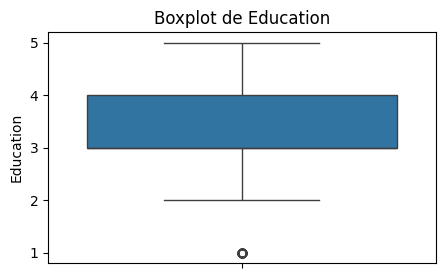

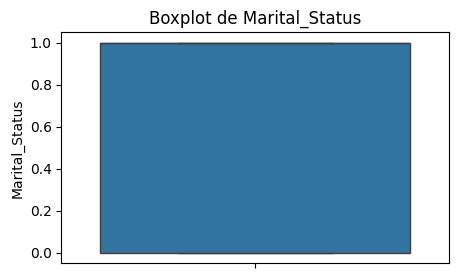

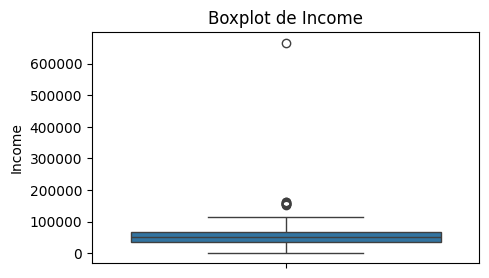

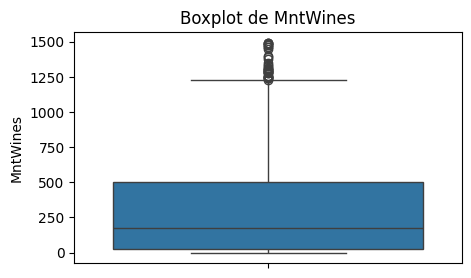

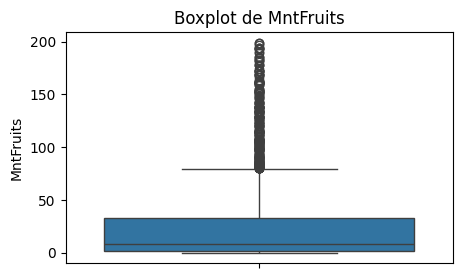

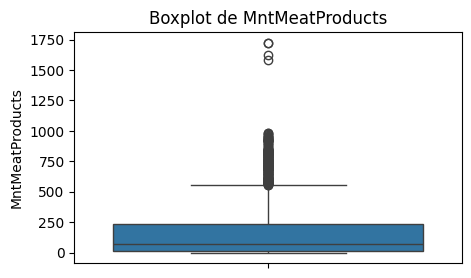

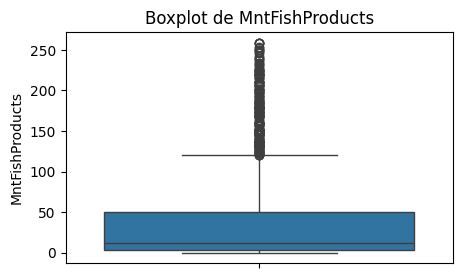

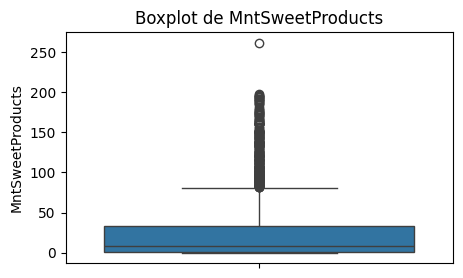

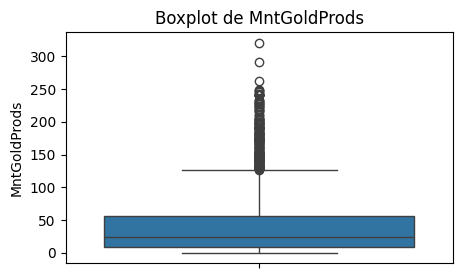

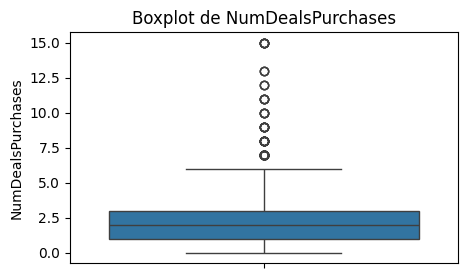

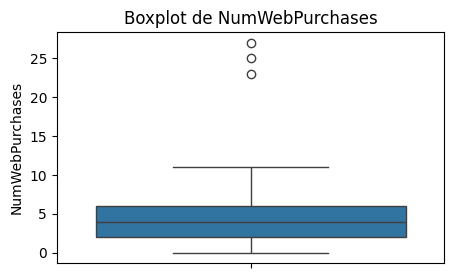

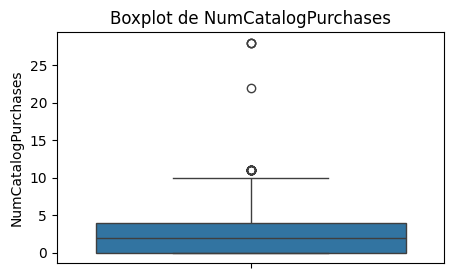

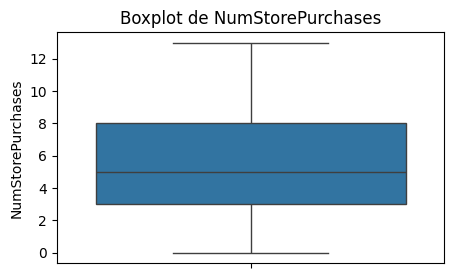

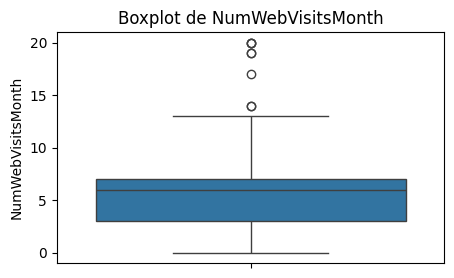

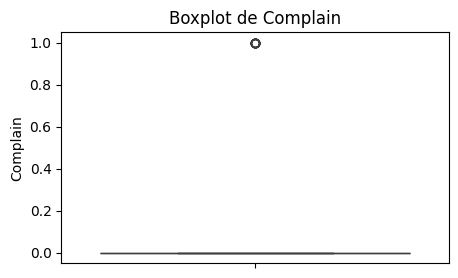

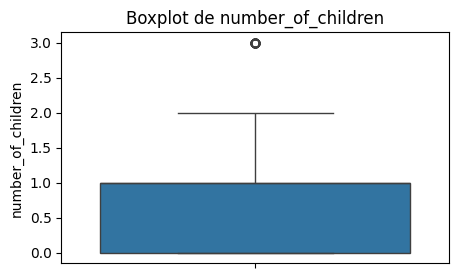

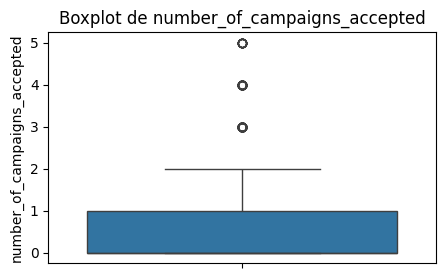

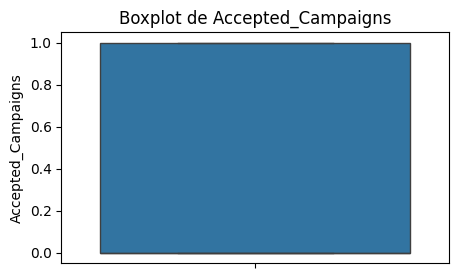

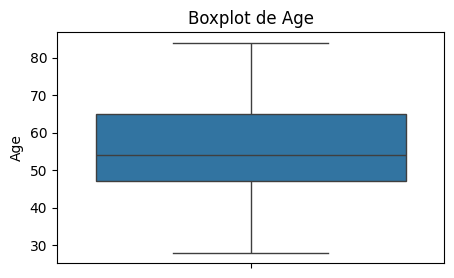

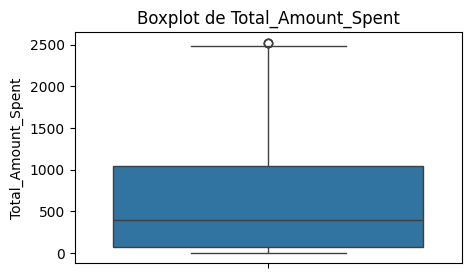

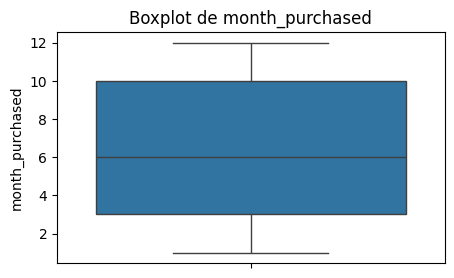

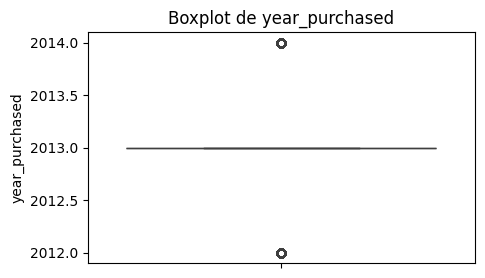

In [ ]:
column_names = df_clean.select_dtypes(include = "number").columns

for col in column_names:
  plt.figure(figsize = (5,3))
  sns.boxplot(df_clean[col])
  plt.title(f"Boxplot de {col}")
  plt.show()

In [ ]:
x= 2209
df_outliers = pd.DataFrame(index = range(x))
df_outliers

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2209 rows x 0 columns]

In [ ]:
all_columns = df_clean.select_dtypes(include = "number").columns
all_columns
# importante para lo que quier hacer seleccionar solo las columnas numericas

Index(['Education', 'Marital_Status', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'number_of_children', 'number_of_campaigns_accepted',
       'Accepted_Campaigns', 'Age', 'Total_Amount_Spent', 'month_purchased',
       'year_purchased'],
      dtype='object')

##### Quiero una tabla solo con los outliers:

Quiero ver en que casos vale la pena eliminar, transformar, etc.

In [ ]:
x= 2209
df_outliers = pd.DataFrame(index = range(x))
df_outliers


all_columns = df_clean.select_dtypes(include = "number").columns

for col in all_columns:
  Q1 = df_clean[col].quantile(0.25)
  Q2 = df_clean[col].quantile(0.75)
  IQR = Q2 - Q1
  lower_bound = Q1 - 1.5* IQR
  upper_bound = Q2 + 1.5* IQR


  outliers_column = df_clean[col].where((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound))

  df_outliers[col] = outliers_column


df_outliers

Education  Marital_Status  Income  MntWines  MntFruits  MntMeatProducts  \
0           NaN             NaN     NaN       NaN       88.0              NaN   
1           NaN             NaN     NaN       NaN        NaN              NaN   
2           NaN             NaN     NaN       NaN        NaN              NaN   
3           NaN             NaN     NaN       NaN        NaN              NaN   
4           NaN             NaN     NaN       NaN        NaN              NaN   
...         ...             ...     ...       ...        ...              ...   
2204        NaN             NaN     NaN       NaN        NaN            860.0   
2205        NaN             NaN     NaN       NaN        NaN              NaN   
2206        NaN             NaN     NaN       NaN        NaN            631.0   
2207        NaN             NaN     NaN       NaN        NaN              NaN   
2208        NaN             NaN     NaN       NaN        NaN              NaN   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0               172.0              88.0           NaN                NaN   
1                 NaN               NaN           NaN                NaN   
2                 NaN               NaN           NaN                NaN   
3                 NaN               NaN           NaN                NaN   
4                 NaN               NaN           NaN                NaN   
...               ...               ...           ...                ...   
2204              NaN               NaN           NaN                NaN   
2205              NaN               NaN           NaN                NaN   
2206              NaN               NaN           NaN                NaN   
2207              NaN               NaN           NaN                NaN   
2208              NaN               NaN           NaN                NaN   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                 NaN                  NaN                NaN   
1                 NaN                  NaN                NaN   
2                 NaN                  NaN                NaN   
3                 NaN                  NaN                NaN   
4                 NaN                  NaN                NaN   
...               ...                  ...                ...   
2204              NaN                  NaN                NaN   
2205              NaN                  NaN                NaN   
2206              NaN                  NaN                NaN   
2207              NaN                  NaN                NaN   
2208              NaN                  NaN                NaN   

      NumWebVisitsMonth  Complain  number_of_children  \
0                   NaN       NaN                 NaN   
1                   NaN       NaN                 NaN   
2                   NaN       NaN                 NaN   
3                   NaN       NaN                 NaN   
4                   NaN       NaN                 NaN   
...                 ...       ...                 ...   
2204                NaN       NaN                 NaN   
2205                NaN       NaN                 NaN   
2206                NaN       NaN                 NaN   
2207                NaN       NaN                 NaN   
2208                NaN       NaN                 NaN   

      number_of_campaigns_accepted  Accepted_Campaigns  Age  \
0                              NaN                 NaN  NaN   
1                              NaN                 NaN  NaN   
2                              NaN                 NaN  NaN   
3                              NaN                 NaN  NaN   
4                              NaN                 NaN  NaN   
...                            ...                 ...  ...   
2204                           NaN                 NaN  NaN   
2205                           NaN                 NaN  NaN   
2206                           NaN                 NaN  NaN   
2207                    

In [ ]:
df_outliers.describe()

Education  Marital_Status         Income     MntWines   MntFruits  \
count       54.0             0.0       7.000000    35.000000  243.000000   
mean         1.0             NaN  158024.285714  1341.657143  122.325103   
std          0.0             NaN    2778.833551    90.182802   32.792569   
min          1.0             NaN  153924.000000  1230.000000   80.000000   
25%          1.0             NaN  157035.000000  1277.500000   93.000000   
50%          1.0             NaN  157243.000000  1308.000000  115.000000   
75%          1.0             NaN  159268.000000  1422.500000  147.000000   
max          1.0             NaN  162397.000000  1493.000000  199.000000   

       MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
count       173.000000       219.000000        244.000000    201.000000   
mean        758.052023       174.726027        126.786885    173.900498   
std         182.220167        36.899539         33.333637     35.746469   
min         558.000000       121.000000         82.000000    127.000000   
25%         635.000000       145.000000         98.000000    145.000000   
50%         735.000000       169.000000        121.000000    170.000000   
75%         832.000000       202.000000        150.250000    195.000000   
max        1725.000000       259.000000        262.000000    321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count          82.000000              3.0            23.000000   
mean            8.865854             25.0            13.695652   
std             2.522796              2.0             6.108376   
min             7.000000             23.0            11.000000   
25%             7.000000             24.0            11.000000   
50%             8.000000             25.0            11.000000   
75%            10.000000             26.0            11.000000   
max            15.000000             27.0            28.000000   

       NumStorePurchases  NumWebVisitsMonth  Complain  number_of_children  \
count                0.0           8.000000      20.0                48.0   
mean                 NaN          17.875000       1.0                 3.0   
std                  NaN           2.587746       0.0                 0.0   
min                  NaN          14.000000       1.0                 3.0   
25%                  NaN          16.250000       1.0                 3.0   
50%                  NaN          19.000000       1.0                 3.0   
75%                  NaN          20.000000       1.0                 3.0   
max                  NaN          20.000000       1.0                 3.0   

       number_of_campaigns_accepted  Accepted_Campaigns  Age  \
count                     95.000000                 0.0  0.0   
mean                       3.589474                 NaN  NaN   
std                        0.676265                 NaN  NaN   
min                        3.000000                 NaN  NaN   
25%                        3.000000                 NaN  NaN   
50%                        3.000000                 NaN  NaN   
75%                        4.000000                 NaN  NaN   
max                        5.000000                 NaN  NaN   

       Total_Amount_Spent  month_purchased  year_purchased  
count            3.000000              0.0     1026.000000  
mean          2524.666667              NaN     2013.060429  
std              0.577350              NaN        0.998659  
min           2524.000000              NaN     2012.000000  
25%           2524.500000              NaN     2012.000000  
50%           2525.000000              NaN     2014.000000  
75%           2525.000000              NaN     2014.000000  
max           2525.000000              NaN     2014.000000

De aca puedo sacar cuantos outliers tengo para cada caso, evaluar si sacarlos seria ua perdida significativa de informacio o no. Dado que en varios casos veo que hay bastantes outliers, me pregunto como seran las distribuciones de los features,a ver si hay asimetria o multimodalidad:

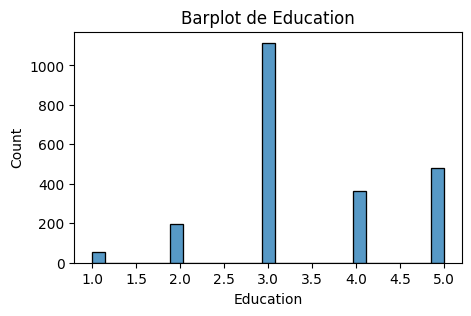

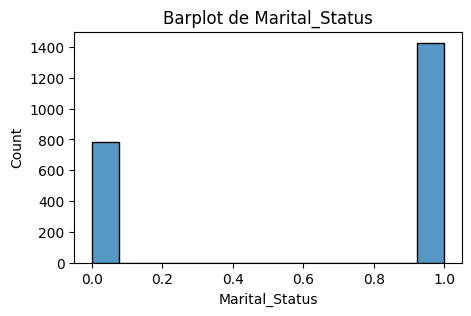

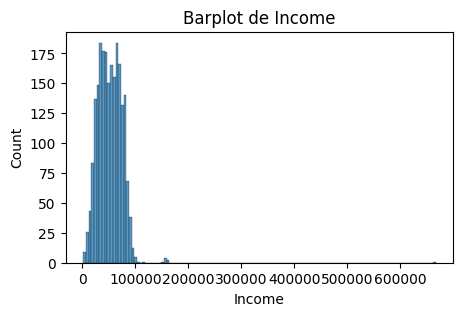

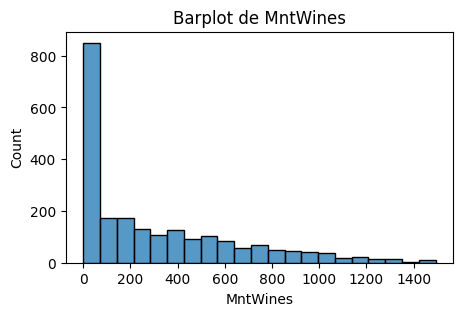

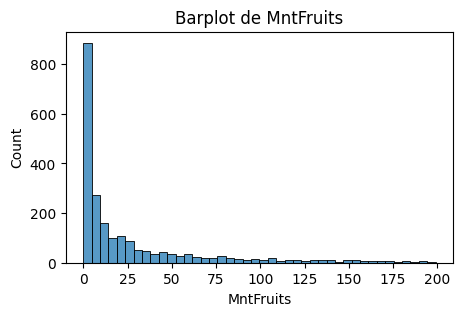

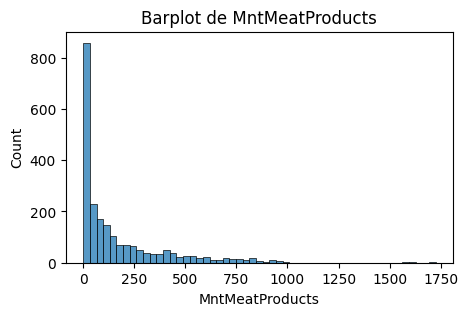

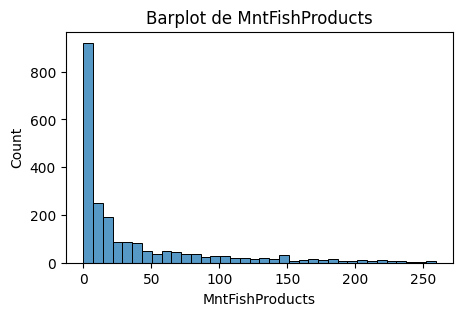

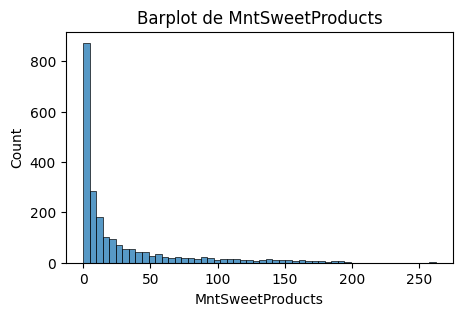

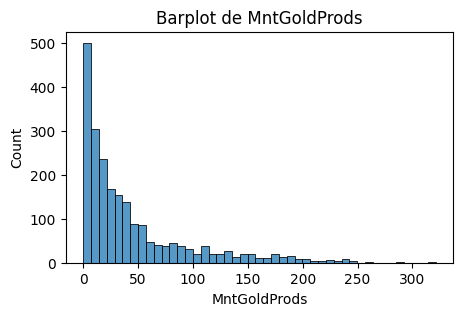

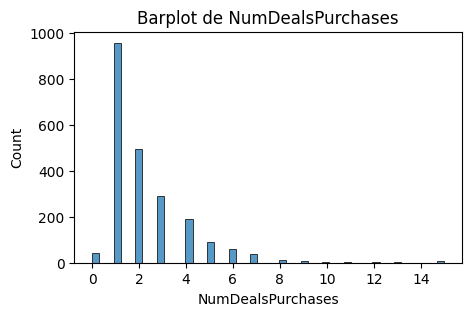

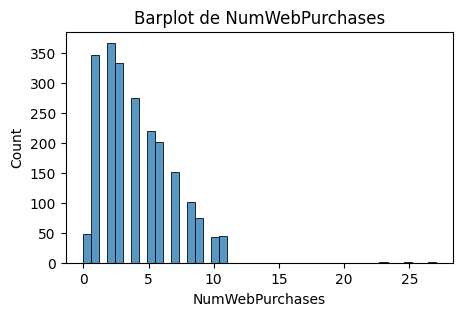

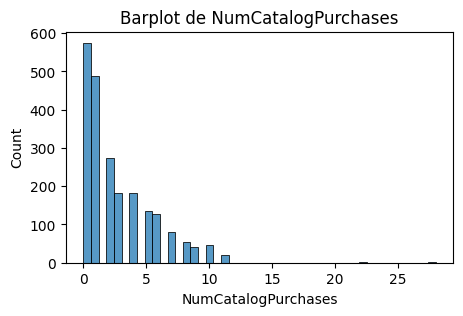

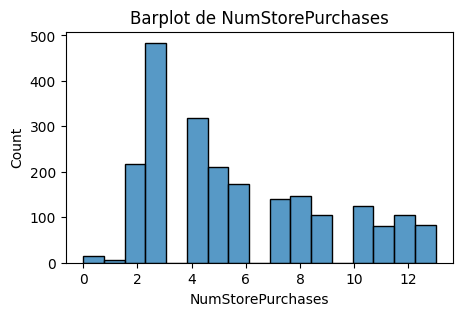

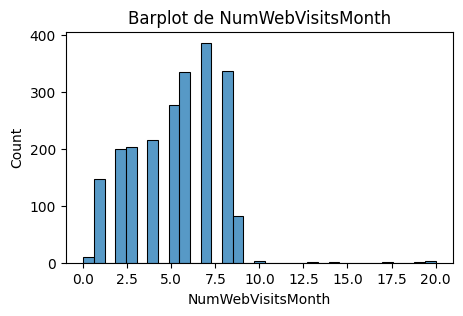

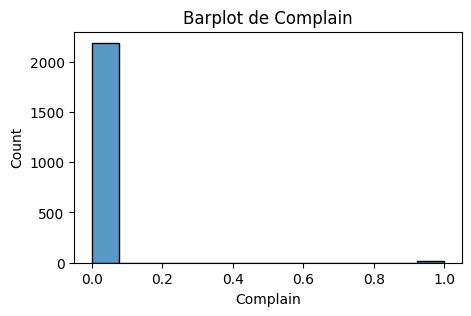

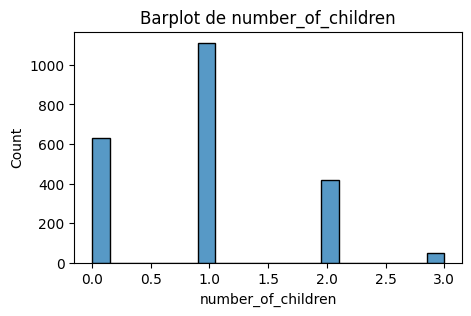

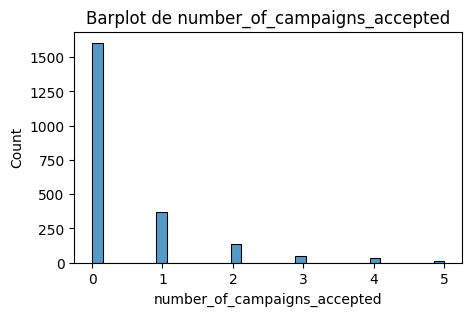

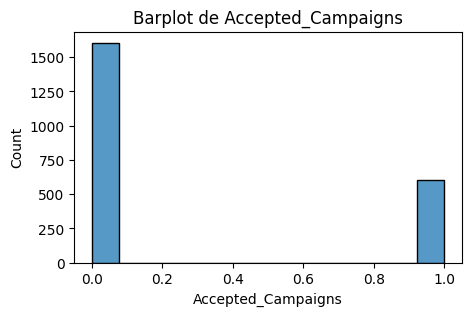

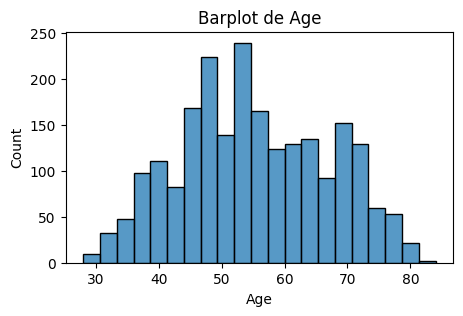

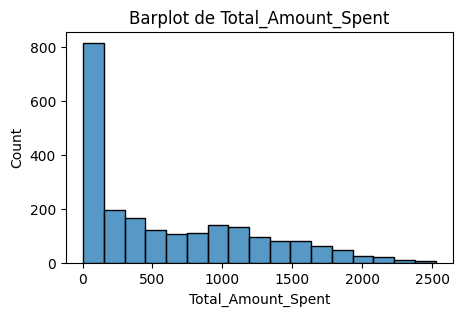

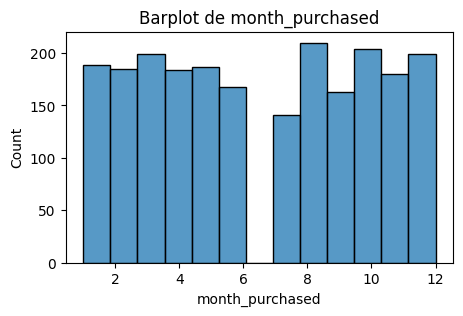

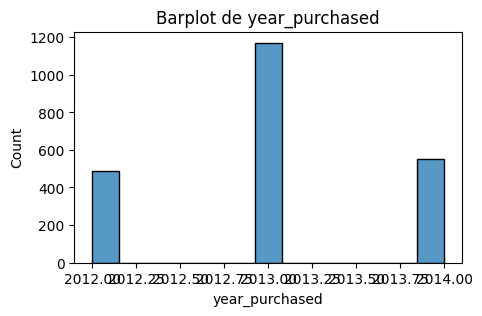

In [ ]:
# Me fijo en la distribucion de las variables:

column_names = df_clean.select_dtypes(include = "number").columns

for col in column_names:
  plt.figure(figsize = (5,3))
  sns.histplot(df_clean[col])
  plt.title(f"Barplot de {col}")
  plt.show()

Observo que la mayoria de las distribuciones son asimetricas. La media no seria un buen estimador de tendencia central a usar en estos casos. Mas,voy a proseguir realizando una estandarizacion escalar; la cual normaliza las variables restandole la media y el desvio st. De esta manera se generan distribuciones centradas en 0 y con st dev de 1.

Para income si voy a sacar outliers porque veo que en realidad sigue una distribucion tendiendo a normal pero que tiene outliers.

In [ ]:
# Saco outliers en Income:

df_clean.drop(df_clean[df_clean["Income"] > 120000].index, inplace = True)

In [ ]:
df_clean[df_clean["Income"] > 120000]



Empty DataFrame
Columns: [Education, Marital_Status, Income, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Complain, number_of_children, number_of_campaigns_accepted, Accepted_Campaigns, Age, Total_Amount_Spent, month_purchased, year_purchased]
Index: []

### 7) Normalizacion de los datos para clustering:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
# creo el objeto scaler que calcula la media y el desvio de cada feature al darle argumento.

scaler.fit(df_clean)
# le decis al objeto scaler que calcule la media y desvio de cada feature

data_scaled = pd.DataFrame(scaler.transform(df_clean), columns = df_clean.columns)
# y aca hago la transformacion propiamente dicha a los datos de df_clean con los parametros aprendidos en scaler.fit(df_clean)
# y lo meto todo en un nuevo df data_scaled

data_scaled

Education  Marital_Status    Income  MntWines  MntFruits  \
0     -0.455257       -1.351080  0.315298  0.973919   1.549881   
1     -0.455257       -1.351080 -0.254008 -0.873863  -0.638067   
2     -0.455257        0.740149  0.965746  0.355031   0.569077   
3     -0.455257        0.740149 -1.204845 -0.873863  -0.562621   
4      1.538815        0.740149  0.322780 -0.394150   0.418184   
...         ...             ...       ...       ...        ...   
2196  -0.455257        0.740149  0.464213  1.193047   0.418184   
2197   1.538815        0.740149  0.598937  0.295807  -0.663216   
2198  -0.455257       -1.351080  0.259448  1.782324   0.543928   
2199   0.541779        0.740149  0.851441  0.360953   0.091249   
2200   1.538815        0.740149  0.060959 -0.657696  -0.587770   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            1.748119         2.460069          1.479104      0.855523   
1           -0.731372        -0.652429         -0.635541     -0.735739   
2           -0.175782         1.343231         -0.149416     -0.037136   
3           -0.667089        -0.505959         -0.586928     -0.755145   
4           -0.217107         0.153159         -0.003578     -0.561088   
...               ...              ...               ...           ...   
2196         0.076758         0.079923          2.208292      3.941020   
2197        -0.621172        -0.689047         -0.659847     -0.696928   
2198         0.237466        -0.103165         -0.368172     -0.386438   
2199         0.223691         0.775658          0.069341      0.331571   
2200        -0.478831        -0.652429         -0.635541     -0.444655   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              0.362672         1.425020             2.632148   
1             -0.167721        -1.131785            -0.587576   
2             -0.698114         1.425020            -0.229829   
3             -0.167721        -0.766527            -0.945324   
4              1.423459         0.329247             0.127918   
...                 ...              ...                  ...   
2196          -0.167721         1.790278             0.127918   
2197           2.484246         1.425020            -0.229829   
2198          -0.698114        -0.766527             0.127918   
2199          -0.167721         0.694504             0.843412   
2200           0.362672        -0.401269            -0.587576   

      NumStorePurchases  NumWebVisitsMonth  Complain  number_of_children  \
0             -0.561918           0.689322 -0.095761           -1.267454   
1             -1.178460          -0.140201 -0.095761            1.402083   
2              1.287706          -0.554962 -0.095761           -1.267454   
3             -0.561918           0.274560 -0.095761            0.067315   
4              0.054623          -0.140201 -0.095761            0.067315   
...                 ...                ...       ...                 ...   
2196          -0.561918          -0.140201 -0.095761            0.067315   
2197          -0.253648           0.689322 -0.095761            2.736851   
2198           2.212519           0.274560 -0.095761           -1.267454   
2199           1.287706          -0.969724 -0.095761            0.067315   
2200          -0.561918           0.689322 -0.095761            1.402083   

      number_of_campaigns_accepted  Accepted_Campaigns       Age  \
0                         0.616742            1.629769  1.016749   
1                        -0.503265           -0.613584  1.273178   
2                        -0.503265           -0.613584  0.332936   
3                        -0.503265           -0.613584 -1.291120   
4                        -0.503265           -0.613584 -1.034691   
...                            ...                 ...       ...   
2196                     -0.503265           -0.613584  0.161982   
2197                      0.616742            1.629769  1.956992   
2198              

### 8) Reduccion de la dimensionalidad:

Voy a reducir la dimensionalidad del ds. Para eso voy a haccer un analisis de los componentes principales (PCA). Esto lo que hace es encontrar una combinacion lineal de x cantidad de features que abarquen la mayor cantidad posible de variabilidad de los datos.  

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Primero voy a investigar cual es el menor nummero de componentes principales (siendo c/compoentne princ una comb lineal de
# features) con el que obtengo la mayor variabilidad posible:

pca = PCA() # defino la funcion pca. Como no le especifico el nummero de componentes que quier que calcule,
# va a calcular todos los componentes principales (igual al numero de features).

data_pca = pca.fit_transform(data_scaled)
# fit calcula media, varianza y combinaciones lineales y transform las aplica a los datos



In [ ]:
var = pca.explained_variance_ratio_
var

array([3.41673969e-01, 9.09359125e-02, 7.55408291e-02, 6.84701477e-02,
       5.37875065e-02, 4.55920172e-02, 4.50106450e-02, 3.79042806e-02,
       3.21705138e-02, 2.97360458e-02, 2.72891160e-02, 2.54118869e-02,
       2.00136058e-02, 1.95225626e-02, 1.85244161e-02, 1.75961036e-02,
       1.46519707e-02, 1.22635248e-02, 1.01975563e-02, 7.51559391e-03,
       6.19179620e-03, 5.05975603e-18])

In [ ]:
# Esto es una array en donde te dice que propoorcion taje de la varibilidad de los datos es capturada por cada componente

len(var)

22

In [ ]:
import numpy as np

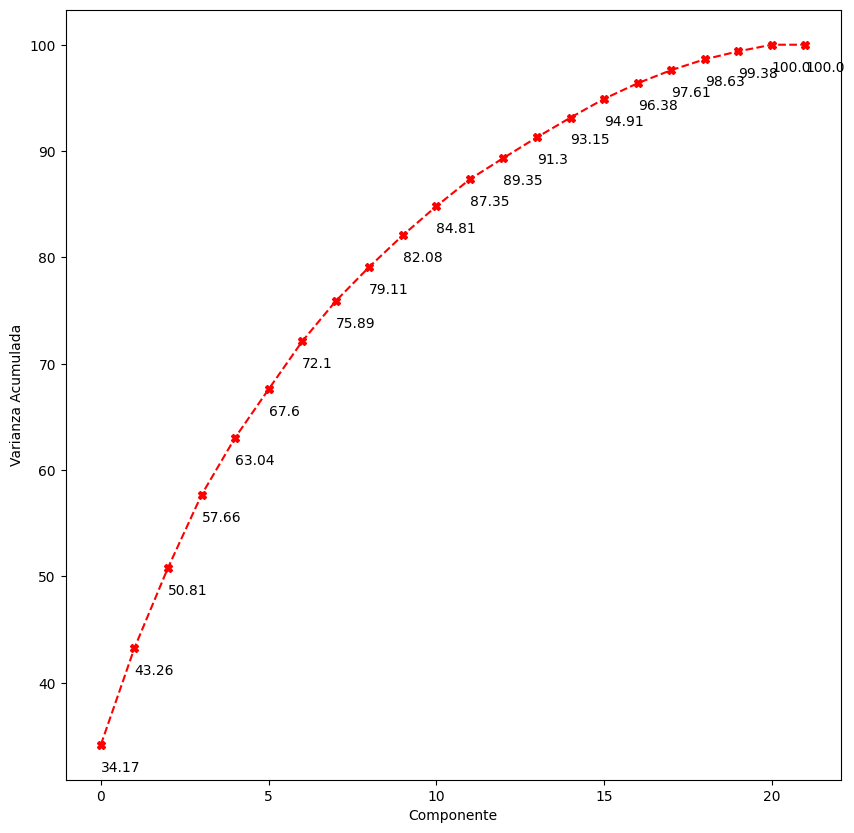

In [ ]:
# Ahora quiero graficar el la varianza acumulada respecto a la cantidad de componentes pricnipales.

# Caclulo la varianza acumulada porcentual:
accVar = np.cumsum(np.round(var, decimals = 4)*100)

# Creo una lista que especifique el numero de componentes:
components = np.arange(0, len(var))

# ploteo cada accVar respecto al numero de componentes pricnnipales:
plt.figure(figsize = (10,10))
plt.plot(accVar, color = "red", marker = "X", linestyle = "--")

# Ahora quiero anotar en cada punto los valores correspondeitnes.
# para eso uso la funcion zip que agarra iterables (listas, tuplas) y los mete en tuplas secuencialmente

for component, varianza in zip(components, accVar):
  plt.annotate(round(varianza, 2), xy = (component, varianza - 2.5))
  # plt.annotate agrega texto. xy define las coordenadas donde estara el texto. si no le pongo el -2.5 me mete el numero muy cerca del punto.

  plt.xlabel("Componente")
  plt.ylabel("Varianza Acumulada")



Entonces de aca puedoi ver que con 4 componentes, puedo explicar el 63% de la variabilidad de los datos. Tomo coo cut off el 60%.



In [ ]:
# Creo un df con los datos con PCA aplicado:

pca = PCA(n_components = 4)
# defino la funcion pca pero de manera que haga 4 componentes pricnipales.

data_pca = pca.fit_transform(data_scaled)

data_pca_df = pd.DataFrame(data_pca, columns = ["col1", "col2", "col3", "col4"])
data_pca_df.describe()

col1          col2          col3          col4
count  2.201000e+03  2.201000e+03  2.201000e+03  2.201000e+03
mean   6.133717e-17  6.456545e-18  1.452723e-17 -1.291309e-17
std    2.742306e+00  1.414744e+00  1.289439e+00  1.227611e+00
min   -5.397440e+00 -3.649629e+00 -4.483794e+00 -4.198892e+00
25%   -2.485182e+00 -9.815241e-01 -8.572427e-01 -8.213990e-01
50%   -8.150606e-01 -1.475989e-01 -3.309214e-02  4.165892e-02
75%    2.286623e+00  8.092020e-01  6.524170e-01  8.221138e-01
max    8.032960e+00  5.382854e+00  4.788786e+00  3.708699e+00

### 9) Segmentacion utilizando KMeans:

En este trabajo se busca realizar una segmentacion de cleintes en base a una sumatoria de features (Edad, educacion, etc). Por llo que corresponde aplicar un modelo de aprendizaje no supervisado, es decir queno no se cuenta con una base de datos etiquetada sino que se buscar encontrar una estructura inherente a los datos.

En particular se epleara el modelo de K-Means, que es un algoritmo que agrupa a los datos de manera que la distancia euclidiana entre puntos de un mismo cluster sea minima.



Primero necesito determinar el numero de clusters optimo, para eos voy a aplicar el metodo del codo. Lo que hace es medir para que numero de clusters se da una desaceleracion en la reducción de la suma de distancias cuadradas de los puntos a su centroide (inercia). Cuando se ve el corte en la grafica inercia vs numero de clusters, significa que por encima de ese numero de cluster, el modelo no mejora tanto mas el agrupamiento de los datos.

In [ ]:
from sklearn.cluster import KMeans
# Para la visualización del método del codo
from yellowbrick.cluster import KElbowVisualizer

Elbow Method para determinacion de numero optimo de clusters por KMeans


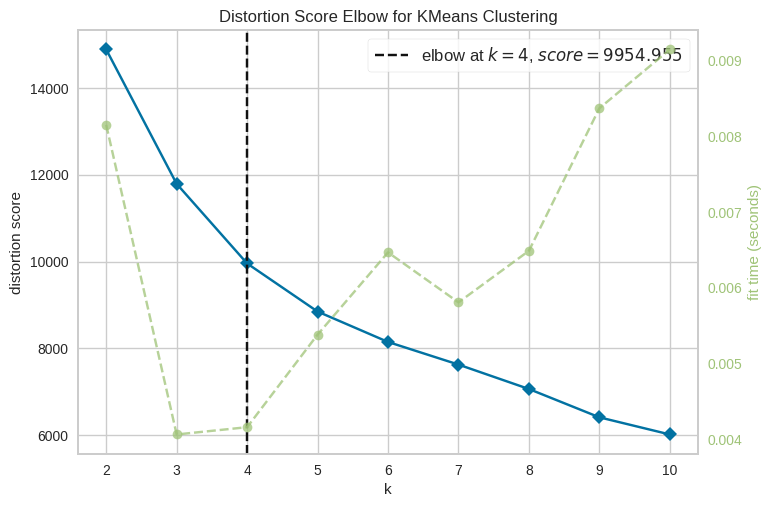

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print("Elbow Method para determinacion de numero optimo de clusters por KMeans")
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(data_pca_df)
Elbow_M.show()


Aplicando el metodo del codo se determina que el numero optimo de clusters es 4. Por lo que procedo realizando un modelado mediante KMeans de 4 clusters.

##### Segmentación por KMeans:

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(data_pca_df)


KMeans(n_clusters=4)

In [ ]:
# Le pido que me de las etiquetas de los clusters, es decir un array que asigna a cada fila a un cluster:
labels = kmeans.labels_
labels

array([2, 3, 0, ..., 2, 0, 1], dtype=int32)

In [ ]:
# Evaluo que tan similar es un objeto a su propio cluster - Indice de Silueta:
from sklearn.metrics import silhouette_score

In [ ]:
# Calculo el indice de silueta:
silhouette_avg = silhouette_score(data_pca_df, labels)

print(f"El índice de silueta promedio es: {silhouette_avg}")

El índice de silueta promedio es: 0.4089165827780654


Un indice de 0.41 indica un agrupamiento moderadamente bueno.

In [ ]:
# Voy a asignar a cada fila su correspondiente cluster:

data_pca_df["Cluster"] = labels
data_pca_df.head()

col1      col2      col3      col4  Cluster
0  4.582347  0.911670  0.034942 -1.624215        2
1 -2.674542 -0.721925  0.220618  1.192547        3
2  1.708382 -0.717114 -1.224404  0.109854        0
3 -2.714187 -1.163197  0.184786 -0.434331        3
4 -0.357314 -0.317439 -0.537365  1.813719        0

In [ ]:
# Le pido que me de los centroides, es decir los puntos promedio de cada cluster
centroids = kmeans.cluster_centers_
centroids

array([[ 0.61199378,  0.67664168, -1.33015101,  0.44122278],
       [ 1.06816107,  2.24977005,  1.26065398,  0.08163172],
       [ 3.95670599, -0.85859759,  0.18749553, -0.20197199],
       [-2.41538168, -0.3816409 ,  0.26142003, -0.12593585]])

#### Estudiar patrones de los clusters formados:

Text(0.5, 1.0, 'Numero de clientes por clsuter')

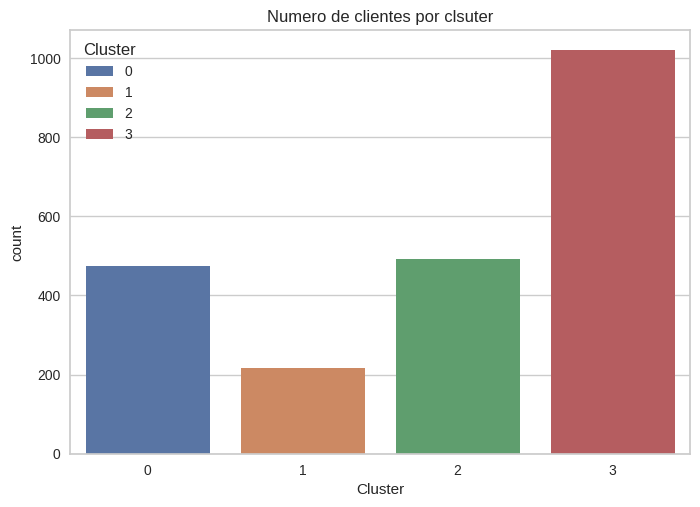

In [ ]:
sns.countplot(data = data_pca_df, x = "Cluster", hue = "Cluster", palette = "deep")
plt.title("Numero de clientes por clsuter")

Vemos que los clusters no estan igual de representados.

In [ ]:
# Para seguir explorando los clusters, voy a asignar a cada fila del df sin transformar
# a un determinado cluster, de manera de poder acceder a los distintos features.

df_clean["Cluster"] = labels
df_clean.head()

Education  Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0          3               0  58138.0       635         88              546   
1          3               0  46344.0        11          1                6   
2          3               1  71613.0       426         49              127   
3          3               1  26646.0        11          4               20   
4          5               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  number_of_children  number_of_campaigns_accepted  \
0         0                   0                             1   
1         0                   2                             0   
2         0                   0                             0   
3         0                   1                             0   
4         0                   1                             0   

   Accepted_Campaigns  Age  Total_Amount_Spent  month_purchased  \
0                   1   67                1617                4   
1                   0   70                  27                8   
2                   0   59                 776                8   
3                   0   40                  53               10   
4                   0   43                 422                1   

   year_purchased  Cluster  
0            2012        2  
1            2014        3  
2            2013        0  
3            2014        3  
4            2014        0

<Axes: xlabel='Total_Amount_Spent', ylabel='Income'>

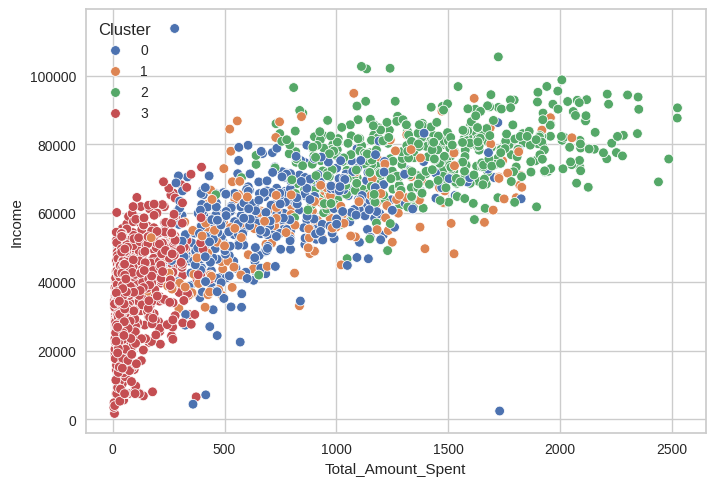

In [ ]:
sns.scatterplot(data = df_clean, x = df_clean["Total_Amount_Spent"], y = df_clean["Income"], hue = df_clean["Cluster"], palette = "deep")

- Cluster 0: gasto promedio e ingresos promedio
- Cluster 1: gasto alto e ingresos promedio
- Cluster 2: gasto alto e ingresos altos
- Cluster 3: gasto bajo e ingresos bajos

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 81.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
<ipython-input-152-4672a9764398>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data = df_clean, x = "Cluster", y = "Total_Amount_Spent", palette = "deep")


<Axes: xlabel='Cluster', ylabel='Total_Amount_Spent'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 24.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


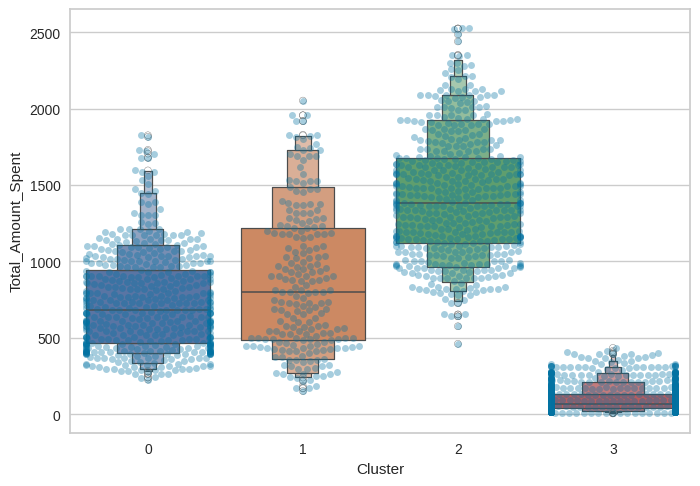

In [ ]:
# grafico de puntos
sns.swarmplot(data = df_clean, x = "Cluster", y = "Total_Amount_Spent", alpha = 0.35)
sns.boxenplot(data = df_clean, x = "Cluster", y = "Total_Amount_Spent", palette = "deep")

Vemos que el cluster 3 que es el que mas gente tiene, es el que menos gasta

In [ ]:
df_clean.head()

Education  Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0          3               0  58138.0       635         88              546   
1          3               0  46344.0        11          1                6   
2          3               1  71613.0       426         49              127   
3          3               1  26646.0        11          4               20   
4          5               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  number_of_children  number_of_campaigns_accepted  \
0         0                   0                             1   
1         0                   2                             0   
2         0                   0                             0   
3         0                   1                             0   
4         0                   1                             0   

   Accepted_Campaigns  Age  Total_Amount_Spent  month_purchased  \
0                   1   67                1617                4   
1                   0   70                  27                8   
2                   0   59                 776                8   
3                   0   40                  53               10   
4                   0   43                 422                1   

   year_purchased  Cluster  
0            2012        2  
1            2014        3  
2            2013        0  
3            2014        3  
4            2014        0

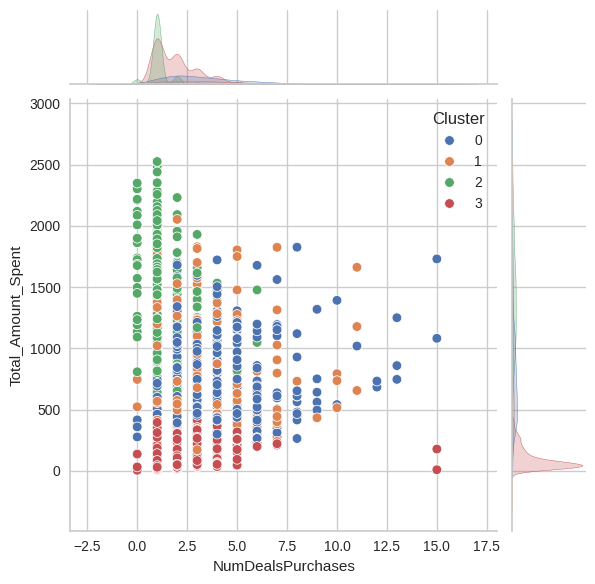

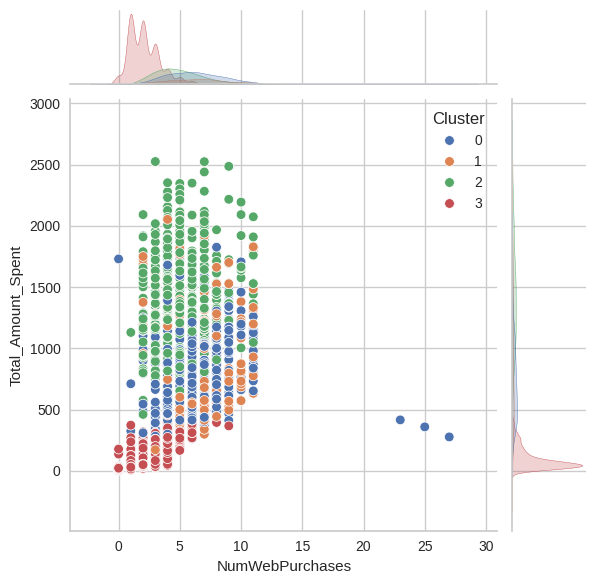

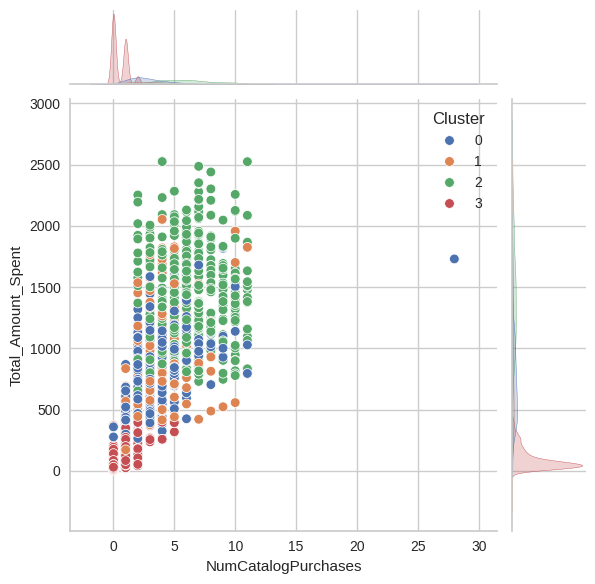

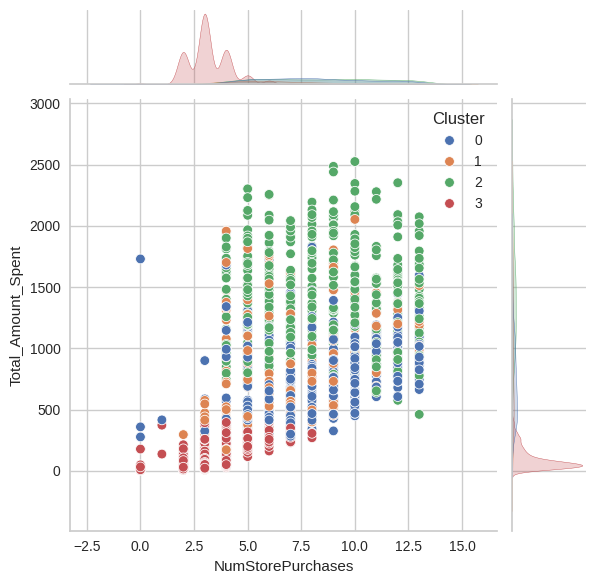

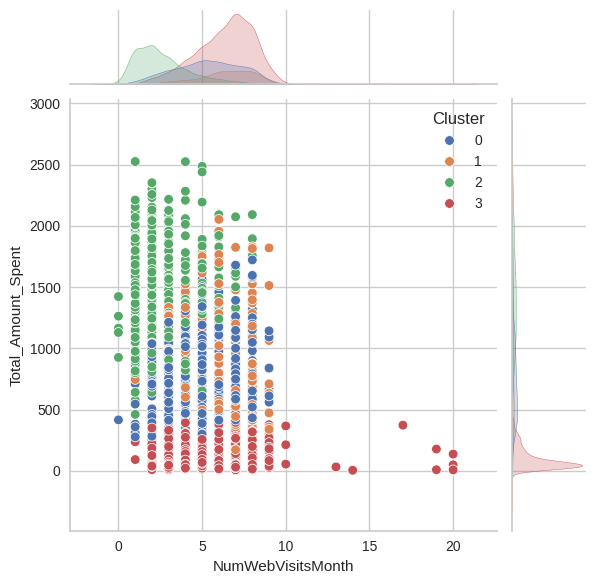

In [ ]:
# En donde compraron?

places = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]

for place in places:
  sns.jointplot(x = df_clean[place], y = df_clean["Total_Amount_Spent"], hue = df_clean["Cluster"], palette = "deep")

Aca hay informacion respecto a que cluster es el que mas gasta en que plataforma.

In [ ]:
df_clean.head()

Education  Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0          3               0  58138.0       635         88              546   
1          3               0  46344.0        11          1                6   
2          3               1  71613.0       426         49              127   
3          3               1  26646.0        11          4               20   
4          5               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  number_of_children  number_of_campaigns_accepted  \
0         0                   0                             1   
1         0                   2                             0   
2         0                   0                             0   
3         0                   1                             0   
4         0                   1                             0   

   Accepted_Campaigns  Age  Total_Amount_Spent  month_purchased  \
0                   1   67                1617                4   
1                   0   70                  27                8   
2                   0   59                 776                8   
3                   0   40                  53               10   
4                   0   43                 422                1   

   year_purchased  Cluster  
0            2012        2  
1            2014        3  
2            2013        0  
3            2014        3  
4            2014        0

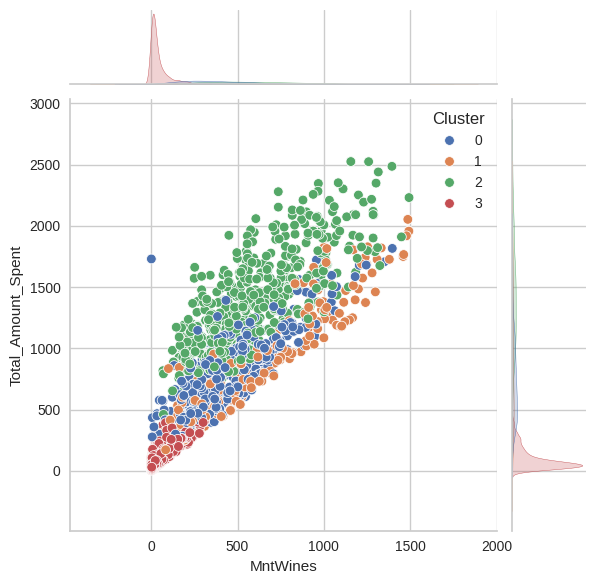

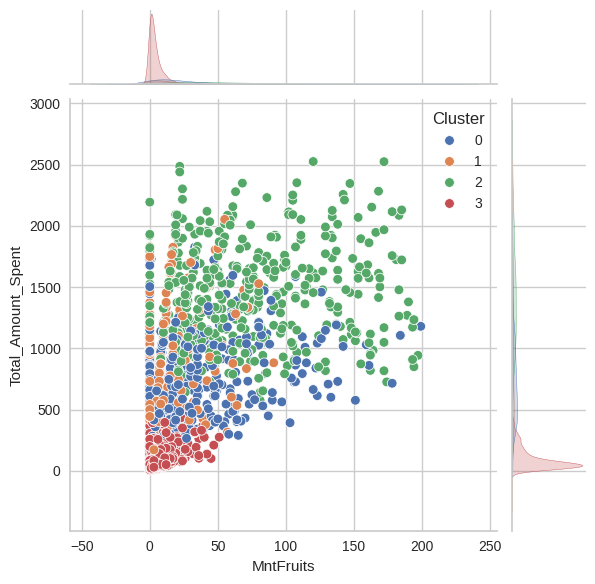

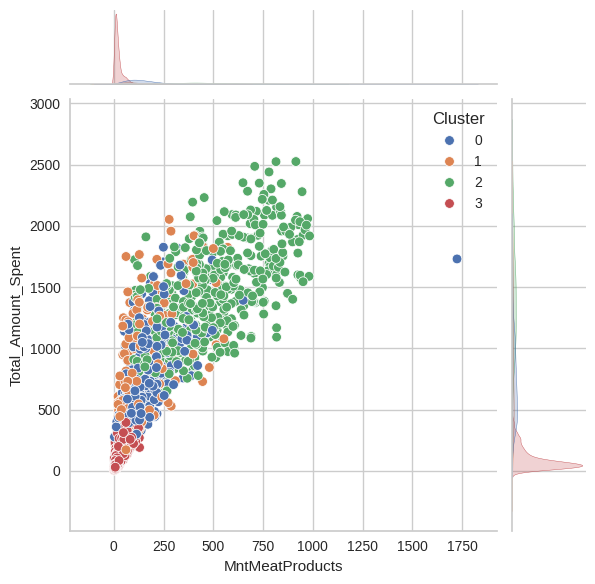

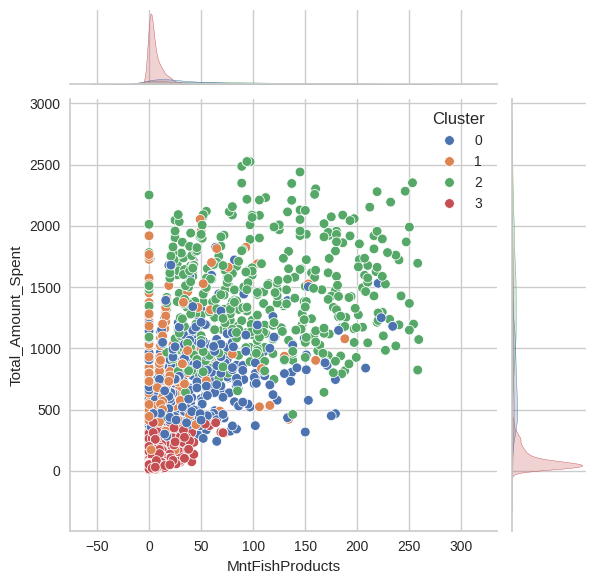

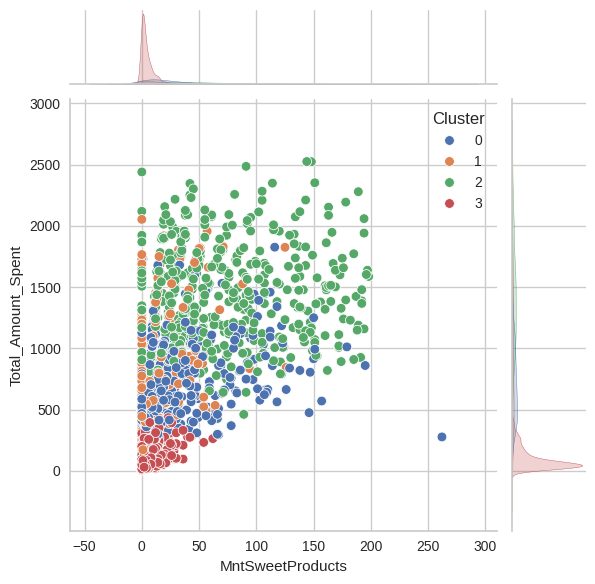

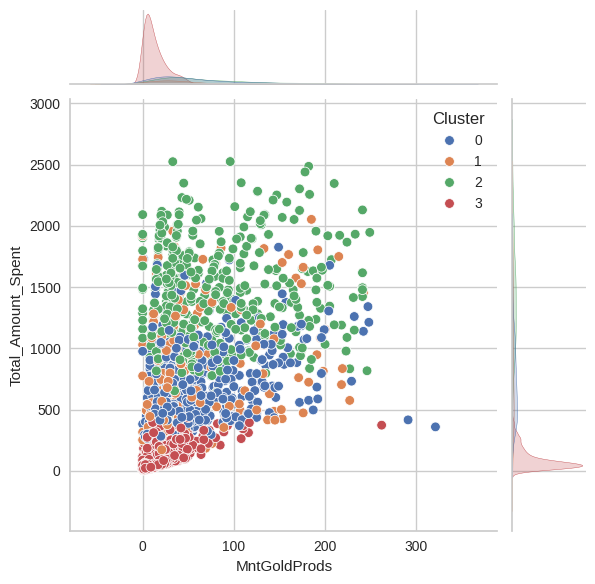

In [ ]:
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

for product in products:
  sns.jointplot(data = df_clean, x = product, y = "Total_Amount_Spent", hue = "Cluster", palette = "deep")
  plt.xlabel(f"{product}")

Y aca tmb hay buena informacion respecto a los productos que compra cada cluster.

Ahora exploremos quienes estan en cada cluster:

In [ ]:
df_clean.head()

Education  Marital_Status   Income  MntWines  MntFruits  MntMeatProducts  \
0          3               0  58138.0       635         88              546   
1          3               0  46344.0        11          1                6   
2          3               1  71613.0       426         49              127   
3          3               1  26646.0        11          4               20   
4          5               1  58293.0       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              172                88            88                  3   
1                2                 1             6                  2   
2              111                21            42                  1   
3               10                 3             5                  2   
4               46                27            15                  5   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                8                   10                  4                  7   
1                1                    1                  2                  5   
2                8                    2                 10                  4   
3                2                    0                  4                  6   
4                5                    3                  6                  5   

   Complain  number_of_children  number_of_campaigns_accepted  \
0         0                   0                             1   
1         0                   2                             0   
2         0                   0                             0   
3         0                   1                             0   
4         0                   1                             0   

   Accepted_Campaigns  Age  Total_Amount_Spent  month_purchased  \
0                   1   67                1617                4   
1                   0   70                  27                8   
2                   0   59                 776                8   
3                   0   40                  53               10   
4                   0   43                 422                1   

   year_purchased  Cluster  
0            2012        2  
1            2014        3  
2            2013        0  
3            2014        3  
4            2014        0

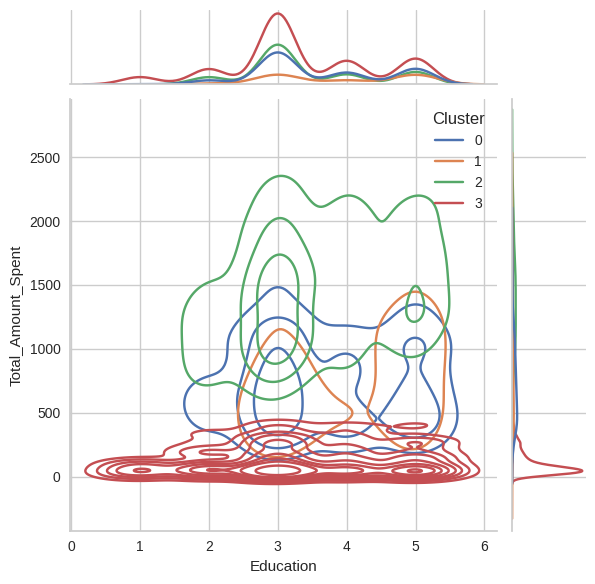

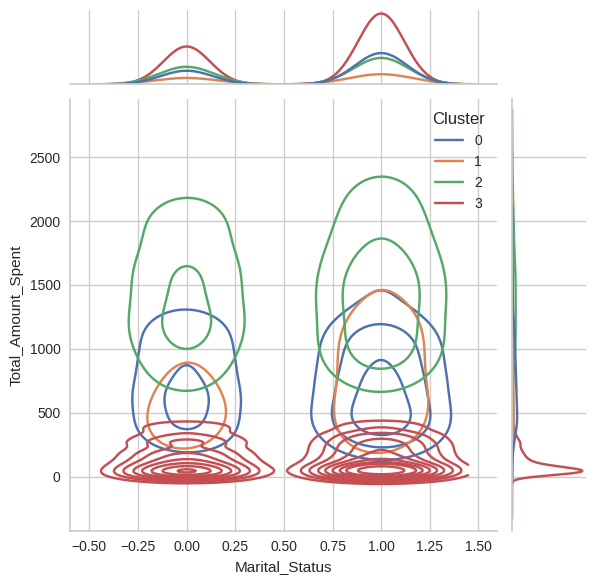

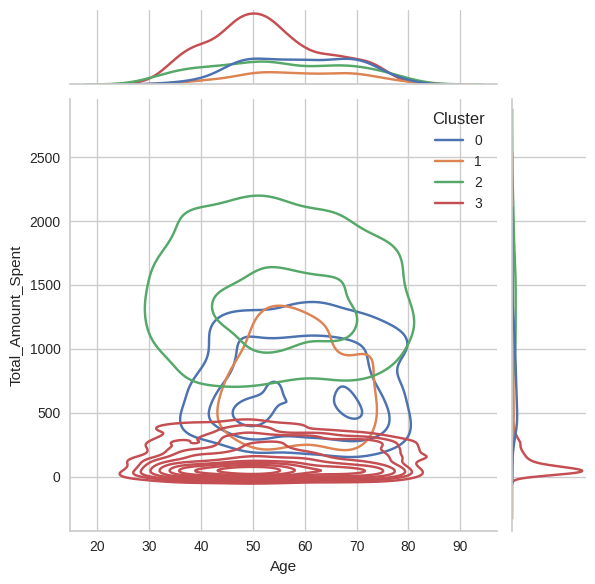

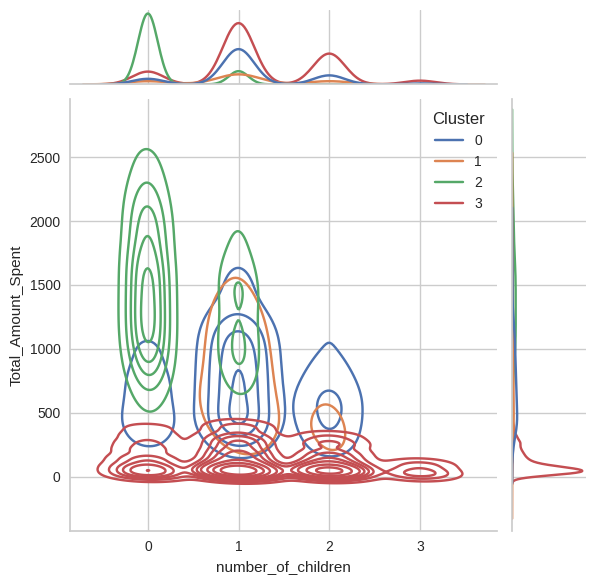

In [ ]:
# Education
# Marital_Status
# Age
# number_of_children
personal_information = ["Education", "Marital_Status", "Age", "number_of_children"]


for feature in personal_information:
  sns.jointplot(kind = "kde", data = df_clean, x = feature, y = "Total_Amount_Spent", hue = "Cluster", palette = "deep")

## Conclusiones:
Considerando estos resultados ordenaremos los cleintes en 4 perfiles o grupos:

**Grupo 0: (Cliente Promedio)**
* Ciente promedio con gasto promedio e ingresos promedio.
* Educacion de grado o superior.
* Mas de 40 años, en pareja o sin
* Con 1 o 2 hijos

**Grupo 1: (Cliente de Alto Consumo)**
* Cliente menos abundante pero que consume mas alto que el promedio.
* Ingresos promedio.
* Educacion de grado o superior.
* Mas de 40 años, en pareja o sin
* Con 1 o 2 hijos

**Grupo 2: (Cliente de Mayor Consumo)**
* Cliente que mas gasta, de ingresos altos.
* Principalmente sin hijos.
* Educacion de grado o superior.
* Mas de 40 años, en pareja o sin


**Grupo 3: (Cliente con ingresos bajos y menor gasto)**
* Cliente mas abundante, sin embargo el que menos gasta ya que tiene ingresos bajos.
* Educacion de grado o superior.
* La mayoria esta o casado o en pareja.
* La mayoria con 40-55 años de edad.
* La mayoria con al menos 1 hijo.




### **Desarrollo de campañas de marketing personalizado:**

**Grupo 0: (Cliente Promedio)**
- Aumentar el compromiso y la frecuencia de compra con descuentos. Para eso, crear ofertas personalizadas basadas en productos de consumo promedio. Se les puede enviar promociones de productos que consumen regularmente.

**Grupo 1: (Cliente de Alto Consumo)**
- Mantener su fidelidad y potenciar el gasto con productos premium. Se pueden crear ofertas exclusivas y programas de recompensas premium. Estos clientes tienen un consumo alto, por lo que puede ser beneficioso personalizar experiencias de lujo, acceso anticipado a nuevos productos, etc.

**Grupo 2: (Cliente de Mayor Consumo)**
- Ofrecer productos de gama alta o bundles premium que combinen varios productos. Son clientes con ingresos altos y, por lo tanto, están dispuestos a gastar más en productos de valor.

**Grupo 3: (Cliente con ingresos bajos y menor gasto)**
- Aumentar la frecuencia de compra con incentivos atractivos sin aumentar demasiado los precios. Enfocarse en promociones de bajo costo, descuentos frecuentes y productos económicos. Incentivar compras con facilidades de pago o recompensas por compras repetidas.